In [1]:
!nvidia-smi

Fri Aug 30 10:49:02 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.6/871.6 kB 48.1 MB/s eta 0:00:00


In [3]:
!mkdir -p {HOME}/weights
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10n.pt
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10s.pt
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10m.pt
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10b.pt
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10x.pt
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10l.pt
!ls -lh {HOME}/weights

total 408M
-rw-r--r-- 1 root root  80M May 23 09:38 yolov10b.pt
-rw-r--r-- 1 root root 100M May 23 09:38 yolov10l.pt
-rw-r--r-- 1 root root  64M May 23 09:38 yolov10m.pt
-rw-r--r-- 1 root root  11M May 23 09:38 yolov10n.pt
-rw-r--r-- 1 root root  32M May 23 09:38 yolov10s.pt
-rw-r--r-- 1 root root 123M May 23 09:38 yolov10x.pt


In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="9XdAHsKrzYkClDUj6dSW")
project = rf.workspace("micahmichael03").project("carla_object-detection")
version = project.version(3)
dataset = version.download("yolov9")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.8
    Uninstalling idna-3.8:
      Successfully uninstalled idna-3.8
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Carla_Object-detection-3 in yolov9:: 100%|██████████| 3272/3272 [00:00<00:00, 9922.22it/s]


In [6]:
from ultralytics import YOLO

# Load YOLOv10n model from scratch
model = YOLO("yolov10n.pt")

# Train the model
model.train(data="/content/Carla_Object-detection-3/data.yaml", epochs=170, imgsz=150)

Ultralytics YOLOv8.2.83 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov10n.pt, data=/content/Carla_Object-detection-3/data.yaml, epochs=170, time=None, patience=100, batch=16, imgsz=150, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, s

100%|██████████| 755k/755k [00:00<00:00, 111MB/s]


Overriding model.yaml nc=80 with nc=11

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1      9856  ultralytics.nn.modules.block.SCDown          [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1     36096  ultralytic

100%|██████████| 6.25M/6.25M [00:00<00:00, 263MB/s]


AMP: checks passed ✅
WARNING ⚠️ imgsz=[150] must be multiple of max stride 32, updating to [160]


`torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
train: Scanning /content/Carla_Object-detection-3/train/labels... 1410 images, 2 backgrounds, 0 corrupt: 100%|██████████| 1410/1410 [00:00<00:00, 1943.36it/s]

train: New cache created: /content/Carla_Object-detection-3/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/Carla_Object-detection-3/valid/labels... 190 images, 1 backgrounds, 0 corrupt: 100%|██████████| 190/190 [00:00<00:00, 1471.58it/s]


val: New cache created: /content/Carla_Object-detection-3/valid/labels.cache
Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000667, momentum=0.9) with parameter groups 95 weight(decay=0.0), 108 weight(decay=0.0005), 107 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 160 train, 160 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 170 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/170     0.369G      4.973      9.001      2.284          6        160: 100%|██████████| 89/89 [00:18<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.83it/s]


                   all        190       1300    0.00241     0.0293    0.00749    0.00299

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/170     0.323G      4.647      5.498      2.002         15        160: 100%|██████████| 89/89 [00:14<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.21it/s]

                   all        190       1300      0.816     0.0863     0.0622     0.0276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/170     0.321G      4.376      4.163      1.953          8        160: 100%|██████████| 89/89 [00:14<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.00it/s]

                   all        190       1300      0.807     0.0795     0.0618     0.0285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/170     0.321G      4.268      3.829      1.917          6        160: 100%|██████████| 89/89 [00:13<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.74it/s]

                   all        190       1300      0.255     0.0913     0.0613     0.0297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/170     0.321G      4.118      3.607      1.914         21        160: 100%|██████████| 89/89 [00:13<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.89it/s]

                   all        190       1300      0.366      0.105     0.0934     0.0461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/170     0.321G      3.954      3.349      1.887          9        160: 100%|██████████| 89/89 [00:14<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.03it/s]

                   all        190       1300      0.497     0.0967     0.0997     0.0485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/170     0.323G      3.895      3.269      1.864          9        160: 100%|██████████| 89/89 [00:14<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.92it/s]

                   all        190       1300      0.513     0.0929      0.106     0.0534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/170     0.321G      3.853      3.193      1.853         21        160: 100%|██████████| 89/89 [00:13<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.85it/s]

                   all        190       1300      0.472      0.108      0.108     0.0516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/170     0.323G      3.863      3.099      1.856         15        160: 100%|██████████| 89/89 [00:13<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.71it/s]

                   all        190       1300      0.502     0.0864      0.109     0.0513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/170     0.321G      3.782      3.012      1.864         14        160: 100%|██████████| 89/89 [00:14<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.76it/s]

                   all        190       1300      0.436       0.12      0.122      0.067



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/170     0.321G      3.772      3.043      1.854          7        160: 100%|██████████| 89/89 [00:13<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.82it/s]

                   all        190       1300      0.467      0.117      0.107     0.0584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/170     0.321G      3.757      3.002      1.846         11        160: 100%|██████████| 89/89 [00:14<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.62it/s]

                   all        190       1300      0.415      0.113      0.112     0.0576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/170     0.321G      3.703      2.918      1.829         15        160: 100%|██████████| 89/89 [00:14<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.22it/s]

                   all        190       1300      0.453      0.141      0.137     0.0733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/170     0.321G      3.572      2.794      1.818         10        160: 100%|██████████| 89/89 [00:14<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.21it/s]

                   all        190       1300       0.56      0.122      0.129     0.0698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/170     0.321G      3.592      2.826      1.819         14        160: 100%|██████████| 89/89 [00:14<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.33it/s]

                   all        190       1300      0.617     0.0997      0.136     0.0719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/170     0.321G      3.555      2.782      1.816          9        160: 100%|██████████| 89/89 [00:14<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.01it/s]

                   all        190       1300      0.555      0.125      0.133     0.0742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/170     0.321G       3.54      2.786      1.822          8        160: 100%|██████████| 89/89 [00:14<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.28it/s]

                   all        190       1300      0.639      0.098      0.143     0.0729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/170     0.321G      3.504      2.716        1.8         26        160: 100%|██████████| 89/89 [00:14<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.51it/s]

                   all        190       1300      0.614      0.139      0.149     0.0815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/170     0.321G      3.513      2.704      1.806          7        160: 100%|██████████| 89/89 [00:14<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.11it/s]

                   all        190       1300      0.403      0.154      0.144     0.0784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/170     0.321G      3.493      2.657      1.802         16        160: 100%|██████████| 89/89 [00:14<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.11it/s]

                   all        190       1300      0.609      0.157      0.161     0.0823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/170     0.321G      3.474      2.593      1.808         14        160: 100%|██████████| 89/89 [00:16<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.17it/s]

                   all        190       1300      0.631      0.122       0.15     0.0813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/170     0.321G      3.459      2.651      1.807         22        160: 100%|██████████| 89/89 [00:14<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.89it/s]

                   all        190       1300        0.7       0.13      0.187     0.0999



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/170     0.321G      3.394      2.577      1.788         13        160: 100%|██████████| 89/89 [00:14<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.05it/s]

                   all        190       1300        0.6       0.15      0.171     0.0953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/170     0.321G      3.454      2.565      1.793         16        160: 100%|██████████| 89/89 [00:14<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.83it/s]


                   all        190       1300      0.623      0.139      0.189      0.104

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/170     0.321G      3.366      2.514      1.793         25        160: 100%|██████████| 89/89 [00:14<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.99it/s]

                   all        190       1300      0.574      0.168      0.177     0.0854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/170     0.321G      3.361       2.55      1.787         21        160: 100%|██████████| 89/89 [00:14<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.00it/s]

                   all        190       1300      0.579      0.158      0.192      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/170     0.321G      3.369      2.502      1.786         17        160: 100%|██████████| 89/89 [00:14<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.41it/s]

                   all        190       1300      0.452      0.171      0.181     0.0946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/170     0.321G      3.357      2.483      1.786         11        160: 100%|██████████| 89/89 [00:14<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.67it/s]

                   all        190       1300      0.652       0.16      0.208      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/170     0.321G      3.348        2.5      1.774         14        160: 100%|██████████| 89/89 [00:14<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.01it/s]

                   all        190       1300       0.41      0.146      0.183      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/170     0.321G      3.332      2.477      1.781          8        160: 100%|██████████| 89/89 [00:14<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.96it/s]

                   all        190       1300      0.516      0.168      0.203      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/170     0.321G      3.355      2.478      1.785          6        160: 100%|██████████| 89/89 [00:14<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.02it/s]

                   all        190       1300      0.494      0.167      0.206      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/170     0.321G      3.273      2.433      1.767         15        160: 100%|██████████| 89/89 [00:14<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.11it/s]

                   all        190       1300      0.493      0.162      0.211      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/170     0.321G      3.271      2.405      1.788         13        160: 100%|██████████| 89/89 [00:14<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.02it/s]

                   all        190       1300      0.492      0.146      0.176     0.0975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/170     0.321G       3.29      2.408      1.779          6        160: 100%|██████████| 89/89 [00:14<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.09it/s]

                   all        190       1300      0.444      0.154        0.2      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/170     0.321G      3.222      2.351      1.773         12        160: 100%|██████████| 89/89 [00:14<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.11it/s]

                   all        190       1300        0.5      0.161      0.208      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/170     0.321G      3.235      2.372      1.764         14        160: 100%|██████████| 89/89 [00:16<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.00it/s]

                   all        190       1300      0.612       0.14      0.205      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/170     0.321G      3.242      2.335      1.762         25        160: 100%|██████████| 89/89 [00:14<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.29it/s]

                   all        190       1300      0.489      0.165      0.203      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/170     0.321G      3.244      2.335       1.76         23        160: 100%|██████████| 89/89 [00:14<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.24it/s]

                   all        190       1300      0.487      0.179      0.201       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/170     0.321G      3.239      2.344      1.765         18        160: 100%|██████████| 89/89 [00:14<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.35it/s]


                   all        190       1300      0.523      0.161      0.205      0.111

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/170     0.321G      3.201      2.317      1.765         11        160: 100%|██████████| 89/89 [00:14<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.48it/s]


                   all        190       1300      0.518      0.165      0.225       0.13

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/170     0.321G      3.224      2.262      1.755         15        160: 100%|██████████| 89/89 [00:14<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.76it/s]


                   all        190       1300      0.556      0.163      0.217      0.123

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/170     0.321G       3.22      2.323      1.765          4        160: 100%|██████████| 89/89 [00:14<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.51it/s]

                   all        190       1300      0.551       0.16      0.224       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/170     0.321G       3.17      2.323      1.755         15        160: 100%|██████████| 89/89 [00:14<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.25it/s]

                   all        190       1300      0.503      0.175      0.216      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/170     0.321G       3.18      2.284      1.763         20        160: 100%|██████████| 89/89 [00:14<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.06it/s]

                   all        190       1300      0.564      0.159      0.198      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/170     0.321G       3.18      2.301      1.762          2        160: 100%|██████████| 89/89 [00:14<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.16it/s]

                   all        190       1300      0.513      0.158      0.197      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/170     0.321G      3.199      2.327      1.767         18        160: 100%|██████████| 89/89 [00:14<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.02it/s]

                   all        190       1300      0.513      0.171      0.201      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/170     0.321G      3.138      2.275      1.759         11        160: 100%|██████████| 89/89 [00:14<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.97it/s]

                   all        190       1300      0.569      0.167       0.22      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/170     0.321G      3.122      2.207      1.765          8        160: 100%|██████████| 89/89 [00:14<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.93it/s]

                   all        190       1300      0.465      0.188      0.207      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/170     0.321G      3.144      2.225      1.756         15        160: 100%|██████████| 89/89 [00:14<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.13it/s]

                   all        190       1300       0.56      0.169      0.196      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/170     0.321G      3.168      2.229      1.766         15        160: 100%|██████████| 89/89 [00:15<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.64it/s]

                   all        190       1300      0.436      0.201      0.217      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/170     0.321G      3.047      2.201      1.745         19        160: 100%|██████████| 89/89 [00:14<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.55it/s]


                   all        190       1300      0.431      0.205      0.225       0.13

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/170     0.321G      3.168      2.203      1.747         21        160: 100%|██████████| 89/89 [00:14<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.85it/s]

                   all        190       1300      0.534      0.163      0.222      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/170     0.321G      3.104      2.205      1.748          6        160: 100%|██████████| 89/89 [00:14<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.54it/s]

                   all        190       1300       0.54      0.185      0.236      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/170     0.321G      3.089       2.16      1.746         17        160: 100%|██████████| 89/89 [00:14<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.73it/s]


                   all        190       1300      0.536      0.177      0.217       0.13

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/170     0.321G      3.092      2.186      1.747          5        160: 100%|██████████| 89/89 [00:14<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.23it/s]

                   all        190       1300      0.527      0.185      0.216      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/170     0.321G      3.085      2.183      1.749         12        160: 100%|██████████| 89/89 [00:14<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.06it/s]

                   all        190       1300      0.391      0.182      0.227      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/170     0.321G      3.033      2.128       1.75          7        160: 100%|██████████| 89/89 [00:14<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.09it/s]

                   all        190       1300      0.556       0.18      0.213      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/170     0.321G      3.011      2.089      1.744         11        160: 100%|██████████| 89/89 [00:14<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.17it/s]

                   all        190       1300      0.414      0.183      0.229      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/170     0.321G      3.052      2.151      1.749         12        160: 100%|██████████| 89/89 [00:14<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.86it/s]

                   all        190       1300       0.41      0.179      0.216      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/170     0.321G      3.112      2.174      1.751         17        160: 100%|██████████| 89/89 [00:14<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.26it/s]

                   all        190       1300      0.465      0.185      0.219      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/170     0.321G      3.068      2.187      1.744         12        160: 100%|██████████| 89/89 [00:14<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.05it/s]

                   all        190       1300      0.325      0.206      0.214       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/170     0.321G      3.044      2.154      1.734         12        160: 100%|██████████| 89/89 [00:14<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.63it/s]

                   all        190       1300      0.576      0.174      0.234      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/170     0.321G      2.991      2.066      1.737         21        160: 100%|██████████| 89/89 [00:14<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.17it/s]

                   all        190       1300      0.615      0.153      0.226      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/170     0.321G      2.956      2.093      1.732         12        160: 100%|██████████| 89/89 [00:14<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.69it/s]

                   all        190       1300      0.456      0.202       0.22      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/170     0.321G      3.034      2.102      1.738          9        160: 100%|██████████| 89/89 [00:16<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.11it/s]

                   all        190       1300      0.535      0.193      0.232      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/170     0.321G      3.031       2.11      1.736          4        160: 100%|██████████| 89/89 [00:14<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.94it/s]

                   all        190       1300       0.54      0.165       0.22      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/170     0.321G      3.015      2.085      1.733         10        160: 100%|██████████| 89/89 [00:14<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.60it/s]


                   all        190       1300      0.489      0.202      0.219      0.124

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/170     0.321G      2.976       2.04      1.742          7        160: 100%|██████████| 89/89 [00:13<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.95it/s]


                   all        190       1300      0.498      0.205      0.231      0.131

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/170     0.321G      2.941      2.015      1.731         21        160: 100%|██████████| 89/89 [00:13<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.04it/s]


                   all        190       1300      0.453      0.203      0.216      0.118

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/170     0.321G      2.948      2.052      1.744         10        160: 100%|██████████| 89/89 [00:14<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.13it/s]

                   all        190       1300      0.506      0.199       0.22      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/170     0.321G      2.972      2.049      1.742         12        160: 100%|██████████| 89/89 [00:14<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.98it/s]

                   all        190       1300      0.404       0.23      0.239      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/170     0.321G      2.972       2.05      1.736         14        160: 100%|██████████| 89/89 [00:14<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.01it/s]

                   all        190       1300      0.574      0.203      0.242      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/170     0.321G       2.98      2.025      1.731         13        160: 100%|██████████| 89/89 [00:14<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.44it/s]

                   all        190       1300      0.497      0.205      0.233      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/170     0.321G      2.945      2.068      1.742         15        160: 100%|██████████| 89/89 [00:14<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.12it/s]

                   all        190       1300      0.495      0.232      0.254      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/170     0.321G      2.913      2.049      1.731         23        160: 100%|██████████| 89/89 [00:14<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.96it/s]

                   all        190       1300      0.621      0.162      0.233      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/170     0.321G      2.931      2.031      1.722         15        160: 100%|██████████| 89/89 [00:14<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.15it/s]

                   all        190       1300      0.633      0.199      0.228      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/170     0.321G      2.958      2.096      1.735         10        160: 100%|██████████| 89/89 [00:14<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.67it/s]

                   all        190       1300      0.635      0.204      0.241      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/170     0.321G      2.931      2.031      1.726         19        160: 100%|██████████| 89/89 [00:14<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.09it/s]

                   all        190       1300      0.591      0.215      0.241      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/170     0.321G      2.967      2.035      1.728         17        160: 100%|██████████| 89/89 [00:16<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.19it/s]

                   all        190       1300      0.503      0.203      0.248      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/170     0.321G      2.901      1.976      1.737         12        160: 100%|██████████| 89/89 [00:14<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.96it/s]

                   all        190       1300      0.607      0.196      0.237      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/170     0.321G      2.922      2.059      1.736         11        160: 100%|██████████| 89/89 [00:14<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.02it/s]

                   all        190       1300      0.519      0.196      0.248      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/170     0.321G      2.907      1.998      1.719         15        160: 100%|██████████| 89/89 [00:14<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.45it/s]

                   all        190       1300      0.531       0.23      0.245      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/170     0.321G      2.871      1.966      1.722         15        160: 100%|██████████| 89/89 [00:14<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.47it/s]

                   all        190       1300      0.624      0.195      0.251      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/170     0.321G      2.891      1.984      1.727          6        160: 100%|██████████| 89/89 [00:14<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.27it/s]

                   all        190       1300      0.647      0.203      0.252      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/170     0.321G      2.873      1.999      1.733         32        160: 100%|██████████| 89/89 [00:14<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.11it/s]

                   all        190       1300      0.602      0.196       0.23      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/170     0.321G      2.875      2.009      1.727         22        160: 100%|██████████| 89/89 [00:14<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.15it/s]

                   all        190       1300      0.635      0.198      0.234       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/170     0.321G      2.892      2.018      1.732          8        160: 100%|██████████| 89/89 [00:14<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.40it/s]

                   all        190       1300      0.608      0.208      0.233      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/170     0.321G      2.881      1.982      1.709         19        160: 100%|██████████| 89/89 [00:14<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.06it/s]

                   all        190       1300      0.635      0.207      0.249       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/170     0.321G      2.868      1.935      1.725         20        160: 100%|██████████| 89/89 [00:14<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.24it/s]

                   all        190       1300       0.64      0.191      0.227      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/170     0.321G      2.883      1.968      1.726         47        160: 100%|██████████| 89/89 [00:14<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.17it/s]

                   all        190       1300      0.569      0.214      0.233      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/170     0.321G      2.896      1.987      1.727         17        160: 100%|██████████| 89/89 [00:14<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.43it/s]

                   all        190       1300      0.587      0.219      0.249      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/170     0.321G      2.863      1.953      1.722         12        160: 100%|██████████| 89/89 [00:14<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.02it/s]

                   all        190       1300      0.696      0.195      0.231      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/170     0.321G      2.823      1.931      1.714         12        160: 100%|██████████| 89/89 [00:15<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.56it/s]

                   all        190       1300      0.571      0.221      0.238      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/170     0.321G      2.796      1.892      1.719          9        160: 100%|██████████| 89/89 [00:14<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.89it/s]

                   all        190       1300      0.664      0.201      0.245      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/170     0.321G      2.848      1.949      1.721         10        160: 100%|██████████| 89/89 [00:14<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.96it/s]

                   all        190       1300      0.578      0.195      0.242      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/170     0.321G      2.831      1.917      1.717         11        160: 100%|██████████| 89/89 [00:14<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.95it/s]

                   all        190       1300      0.549      0.226      0.233       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/170     0.321G      2.753      1.885        1.7          8        160: 100%|██████████| 89/89 [00:14<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.04it/s]

                   all        190       1300      0.671      0.197      0.227      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/170     0.321G      2.875      1.965      1.718         10        160: 100%|██████████| 89/89 [00:14<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.35it/s]

                   all        190       1300      0.637      0.194      0.239      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/170     0.321G      2.808      1.939      1.719         18        160: 100%|██████████| 89/89 [00:14<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.34it/s]

                   all        190       1300      0.674      0.188      0.247      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/170     0.321G      2.801      1.909      1.724         22        160: 100%|██████████| 89/89 [00:14<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.14it/s]

                   all        190       1300      0.459      0.291      0.263      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/170     0.321G      2.803      1.911      1.714         19        160: 100%|██████████| 89/89 [00:14<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.39it/s]

                   all        190       1300      0.473      0.274      0.255      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/170     0.321G      2.754      1.889      1.706         14        160: 100%|██████████| 89/89 [00:14<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.17it/s]

                   all        190       1300      0.347      0.324      0.275      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/170     0.321G      2.821      1.932      1.714         20        160: 100%|██████████| 89/89 [00:14<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.25it/s]

                   all        190       1300      0.482      0.304      0.268      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/170     0.321G      2.826      1.897      1.725          8        160: 100%|██████████| 89/89 [00:14<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.10it/s]

                   all        190       1300      0.444      0.332      0.271      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/170     0.321G      2.794      1.899       1.71         10        160: 100%|██████████| 89/89 [00:14<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.16it/s]

                   all        190       1300      0.677      0.185       0.25      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/170     0.321G      2.778      1.838      1.707         19        160: 100%|██████████| 89/89 [00:15<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.91it/s]

                   all        190       1300      0.436      0.272      0.255      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/170     0.321G      2.767      1.892      1.715         14        160: 100%|██████████| 89/89 [00:15<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.01it/s]


                   all        190       1300      0.442      0.286      0.276      0.149

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/170     0.321G      2.763      1.893      1.717         14        160: 100%|██████████| 89/89 [00:16<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.91it/s]

                   all        190       1300      0.536      0.237      0.264       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/170     0.321G      2.778      1.888      1.716         13        160: 100%|██████████| 89/89 [00:14<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.51it/s]

                   all        190       1300      0.619      0.197      0.247      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/170     0.321G      2.761      1.864       1.71         16        160: 100%|██████████| 89/89 [00:14<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.48it/s]

                   all        190       1300      0.659      0.203       0.25      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/170     0.321G      2.734       1.87      1.708         13        160: 100%|██████████| 89/89 [00:14<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.50it/s]

                   all        190       1300      0.654      0.203      0.263      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/170     0.321G      2.758      1.878      1.707          9        160: 100%|██████████| 89/89 [00:15<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.02it/s]

                   all        190       1300      0.647      0.207      0.251      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/170     0.321G      2.778      1.877      1.706         23        160: 100%|██████████| 89/89 [00:14<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.87it/s]

                   all        190       1300      0.346      0.294      0.261      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/170     0.321G      2.716      1.823      1.708         18        160: 100%|██████████| 89/89 [00:14<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.83it/s]

                   all        190       1300      0.646      0.209      0.251      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/170     0.321G      2.711      1.854      1.712          7        160: 100%|██████████| 89/89 [00:14<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.19it/s]

                   all        190       1300       0.69      0.201      0.259      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/170     0.321G      2.779      1.899      1.707         20        160: 100%|██████████| 89/89 [00:14<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.75it/s]

                   all        190       1300      0.629       0.21      0.258      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/170     0.321G      2.744      1.873      1.716         10        160: 100%|██████████| 89/89 [00:14<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.05it/s]

                   all        190       1300      0.662      0.199      0.266      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/170     0.321G      2.712      1.849       1.71         21        160: 100%|██████████| 89/89 [00:14<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.01it/s]

                   all        190       1300      0.639      0.211      0.257      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/170     0.321G      2.764        1.9      1.711         19        160: 100%|██████████| 89/89 [00:14<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.00it/s]

                   all        190       1300      0.681      0.209      0.253      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/170     0.321G      2.743      1.843        1.7         15        160: 100%|██████████| 89/89 [00:14<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.53it/s]

                   all        190       1300      0.586      0.204      0.261      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/170     0.321G      2.713       1.81       1.71         22        160: 100%|██████████| 89/89 [00:15<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.25it/s]

                   all        190       1300      0.726      0.199      0.266      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/170     0.321G      2.709      1.831      1.706         24        160: 100%|██████████| 89/89 [00:15<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.85it/s]

                   all        190       1300      0.625      0.215      0.247      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/170     0.321G      2.708      1.838      1.701          9        160: 100%|██████████| 89/89 [00:14<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.62it/s]

                   all        190       1300      0.657       0.21      0.255      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/170     0.321G        2.7      1.821      1.706         15        160: 100%|██████████| 89/89 [00:14<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.59it/s]

                   all        190       1300       0.37      0.297       0.26      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/170     0.321G      2.698      1.819      1.703         10        160: 100%|██████████| 89/89 [00:14<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.88it/s]

                   all        190       1300       0.36      0.252      0.252      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/170     0.321G      2.697      1.805      1.698         13        160: 100%|██████████| 89/89 [00:14<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.00it/s]

                   all        190       1300      0.371      0.303      0.254      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/170     0.321G      2.697      1.807      1.705          4        160: 100%|██████████| 89/89 [00:14<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.72it/s]

                   all        190       1300      0.422      0.272      0.267      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/170     0.321G      2.697      1.832      1.696         16        160: 100%|██████████| 89/89 [00:14<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.02it/s]

                   all        190       1300      0.381      0.291      0.271      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/170     0.321G       2.71      1.846      1.706         17        160: 100%|██████████| 89/89 [00:14<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.95it/s]

                   all        190       1300      0.464       0.28      0.262      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/170     0.321G      2.637      1.767      1.685         21        160: 100%|██████████| 89/89 [00:14<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.84it/s]

                   all        190       1300      0.365      0.242      0.245      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/170     0.321G       2.66      1.792      1.704         14        160: 100%|██████████| 89/89 [00:14<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.93it/s]

                   all        190       1300      0.374      0.308      0.253       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/170     0.321G      2.664      1.781      1.708          8        160: 100%|██████████| 89/89 [00:14<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.91it/s]

                   all        190       1300      0.622      0.219      0.259      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/170     0.321G       2.62      1.785      1.689          4        160: 100%|██████████| 89/89 [00:14<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.39it/s]


                   all        190       1300      0.356      0.301      0.255      0.151

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/170     0.321G      2.648      1.779      1.702         22        160: 100%|██████████| 89/89 [00:14<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.07it/s]


                   all        190       1300      0.374      0.296      0.266      0.157

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/170     0.321G       2.66      1.786      1.695         11        160: 100%|██████████| 89/89 [00:15<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.09it/s]

                   all        190       1300      0.344      0.325      0.244      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/170     0.321G      2.681      1.803      1.697         18        160: 100%|██████████| 89/89 [00:14<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.71it/s]

                   all        190       1300      0.376      0.305      0.249      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/170     0.321G      2.675      1.813      1.701         13        160: 100%|██████████| 89/89 [00:14<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.03it/s]

                   all        190       1300      0.391      0.333      0.256      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/170     0.321G      2.675      1.817      1.699          5        160: 100%|██████████| 89/89 [00:14<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.18it/s]

                   all        190       1300      0.633      0.212      0.257       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/170     0.321G      2.658      1.801      1.694          7        160: 100%|██████████| 89/89 [00:14<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.19it/s]

                   all        190       1300       0.36      0.302      0.272      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/170     0.321G       2.63      1.755      1.694          7        160: 100%|██████████| 89/89 [00:14<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.98it/s]

                   all        190       1300      0.526      0.251      0.256      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/170     0.321G      2.606      1.808       1.69          9        160: 100%|██████████| 89/89 [00:14<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.98it/s]

                   all        190       1300      0.344      0.286      0.264      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/170     0.321G      2.657      1.803      1.698         10        160: 100%|██████████| 89/89 [00:15<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.86it/s]

                   all        190       1300      0.617      0.219      0.263      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/170     0.321G      2.679       1.81      1.714         14        160: 100%|██████████| 89/89 [00:15<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.59it/s]

                   all        190       1300      0.597      0.218      0.259       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/170     0.321G      2.581       1.73      1.694         19        160: 100%|██████████| 89/89 [00:15<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.99it/s]


                   all        190       1300      0.587      0.217      0.254      0.149

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/170     0.321G      2.652      1.793      1.699         10        160: 100%|██████████| 89/89 [00:15<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.60it/s]

                   all        190       1300      0.625      0.213      0.254      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/170     0.321G      2.625      1.755      1.696         13        160: 100%|██████████| 89/89 [00:15<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.00it/s]

                   all        190       1300       0.37      0.328      0.257       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/170     0.321G      2.609      1.758      1.706          7        160: 100%|██████████| 89/89 [00:14<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.98it/s]

                   all        190       1300      0.432      0.283       0.27      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/170     0.321G      2.607      1.737       1.69          4        160: 100%|██████████| 89/89 [00:15<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.87it/s]

                   all        190       1300      0.362      0.331      0.258      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/170     0.321G      2.641       1.76      1.698         10        160: 100%|██████████| 89/89 [00:17<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.92it/s]

                   all        190       1300      0.636      0.223      0.271      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/170     0.321G      2.578      1.792      1.692         12        160: 100%|██████████| 89/89 [00:15<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.01it/s]

                   all        190       1300      0.647      0.214      0.273      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/170     0.321G      2.594      1.729      1.685         14        160: 100%|██████████| 89/89 [00:14<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.88it/s]

                   all        190       1300      0.646       0.22      0.262      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/170     0.321G      2.578      1.763      1.698         20        160: 100%|██████████| 89/89 [00:15<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.04it/s]

                   all        190       1300      0.352      0.275      0.258      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/170     0.321G      2.597      1.758      1.681         13        160: 100%|██████████| 89/89 [00:15<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.25it/s]

                   all        190       1300      0.361      0.317      0.265       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/170     0.321G      2.567      1.705      1.684         19        160: 100%|██████████| 89/89 [00:14<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.88it/s]

                   all        190       1300       0.64      0.217      0.268      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/170     0.321G      2.589      1.725      1.689         13        160: 100%|██████████| 89/89 [00:14<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.50it/s]


                   all        190       1300      0.631      0.218      0.269      0.153

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/170     0.321G      2.563      1.733      1.687         20        160: 100%|██████████| 89/89 [00:14<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.96it/s]


                   all        190       1300      0.637      0.213      0.264      0.148

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/170     0.321G      2.573      1.723       1.68          8        160: 100%|██████████| 89/89 [00:14<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.07it/s]

                   all        190       1300      0.356      0.291      0.269      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/170     0.321G      2.585       1.73      1.691          7        160: 100%|██████████| 89/89 [00:14<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.73it/s]

                   all        190       1300      0.433      0.292      0.273      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/170     0.321G      2.544      1.703      1.696         11        160: 100%|██████████| 89/89 [00:14<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.66it/s]

                   all        190       1300      0.331      0.304      0.258       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/170     0.321G      2.591       1.76      1.688         16        160: 100%|██████████| 89/89 [00:14<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.77it/s]

                   all        190       1300       0.36      0.335      0.259      0.152


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/170     0.319G      2.496      1.727      1.681         12        160: 100%|██████████| 89/89 [00:16<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.97it/s]

                   all        190       1300      0.617      0.222      0.252      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/170     0.319G      2.476      1.697      1.686         21        160: 100%|██████████| 89/89 [00:14<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.95it/s]

                   all        190       1300      0.627       0.22      0.255      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/170     0.319G      2.456      1.654      1.677         14        160: 100%|██████████| 89/89 [00:16<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.13it/s]

                   all        190       1300      0.636      0.218      0.255       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/170     0.319G      2.448      1.666       1.68          9        160: 100%|██████████| 89/89 [00:14<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.04it/s]

                   all        190       1300       0.62      0.219      0.259       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/170     0.321G      2.405      1.659      1.671          8        160: 100%|██████████| 89/89 [00:15<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.88it/s]

                   all        190       1300      0.373      0.262       0.26       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/170     0.319G      2.401      1.642      1.679          7        160: 100%|██████████| 89/89 [00:14<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.89it/s]

                   all        190       1300      0.458      0.254      0.262       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/170     0.319G      2.434      1.653      1.683         14        160: 100%|██████████| 89/89 [00:14<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.93it/s]

                   all        190       1300      0.453      0.251      0.262       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/170     0.319G       2.38      1.625      1.675          8        160: 100%|██████████| 89/89 [00:14<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.89it/s]

                   all        190       1300      0.622      0.226       0.26       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/170     0.319G      2.451      1.656      1.682          2        160: 100%|██████████| 89/89 [00:14<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.87it/s]

                   all        190       1300      0.622      0.226      0.262      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/170     0.321G      2.413       1.64      1.675         15        160: 100%|██████████| 89/89 [00:14<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.00it/s]

                   all        190       1300      0.624      0.225      0.262      0.151



170 epochs completed in 0.779 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 5.7MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 5.7MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.83 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10n summary (fused): 285 layers, 2,698,706 parameters, 0 gradients, 8.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.13it/s]


                   all        190       1300      0.645      0.214      0.273      0.159
                    30          2          3          0          0      0.043    0.00463
                    60          2          4          1          0          0          0
                    90          1          2          1          0          0          0
                  bike         24         54      0.591      0.241      0.339      0.124
                   bus         21         28      0.429      0.393       0.39      0.254
                   car        174        805       0.57      0.602       0.58      0.379
           green_light          7         12      0.877        0.5      0.508       0.35
             motorbike          2          4          1          0      0.376      0.201
            pedestrian         76        169      0.475     0.0473     0.0852     0.0255
             red_light         20         33      0.546     0.0303      0.058     0.0433
                 truc

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c613b44e140>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.

In [7]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
# !yolo mode=checks

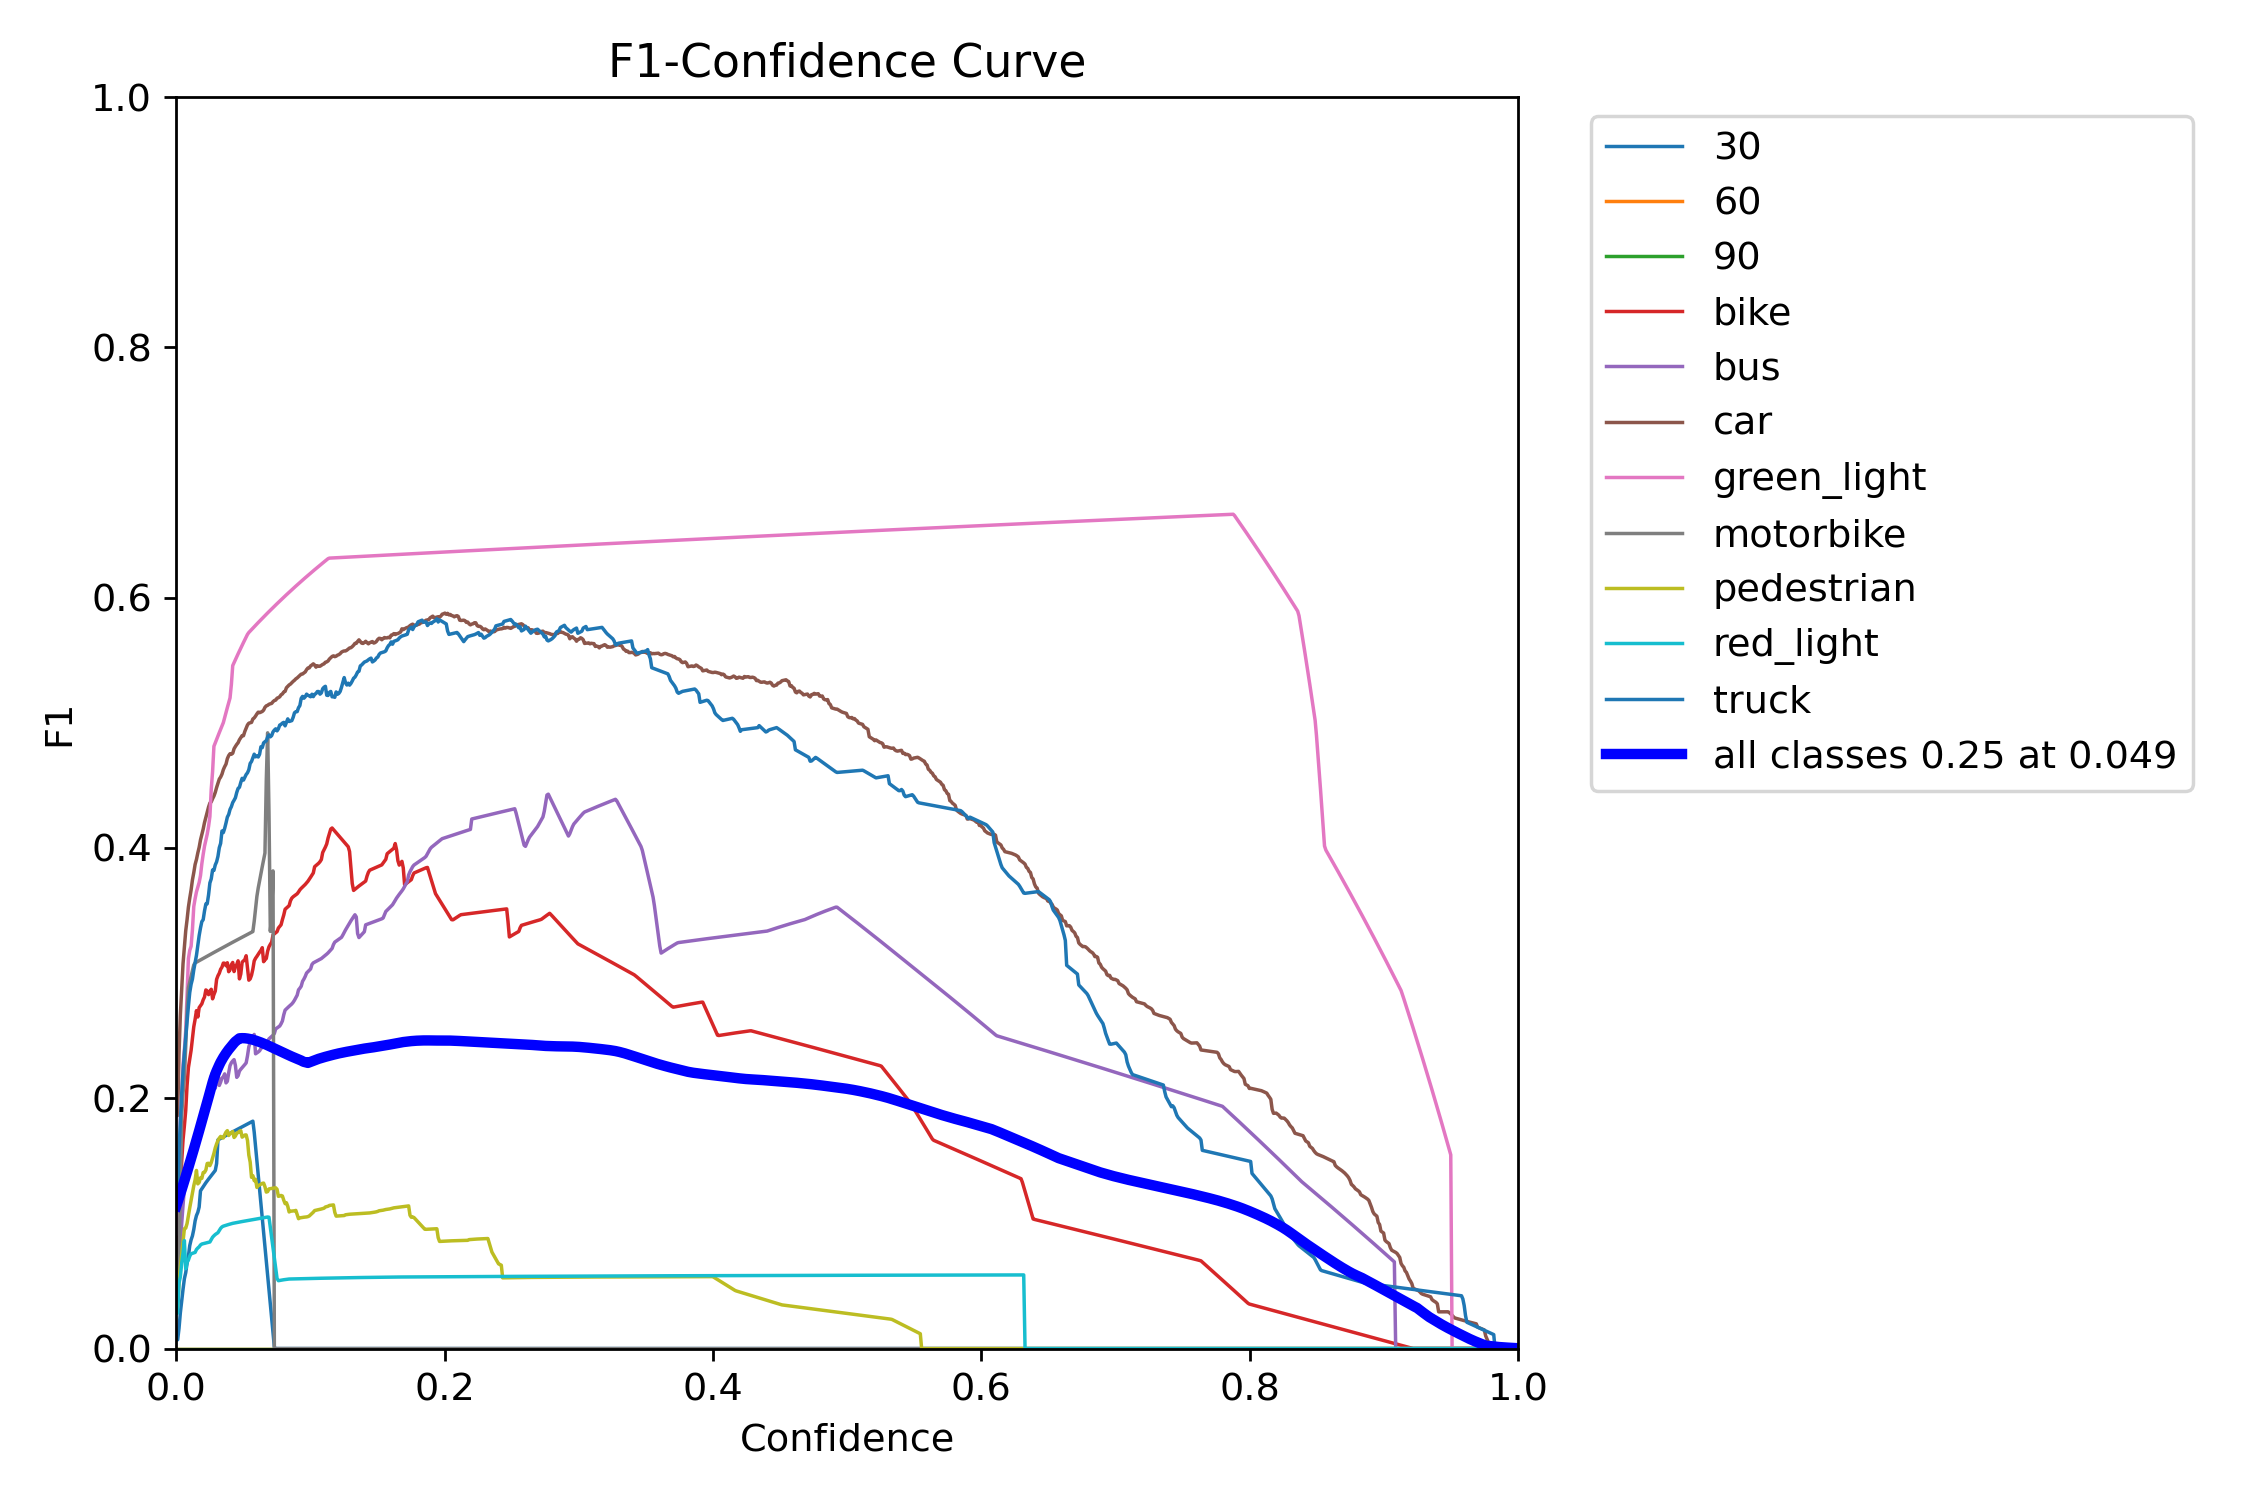

In [8]:
Image(filename=f'/content/runs/detect/train2/F1_curve.png', width=1420)

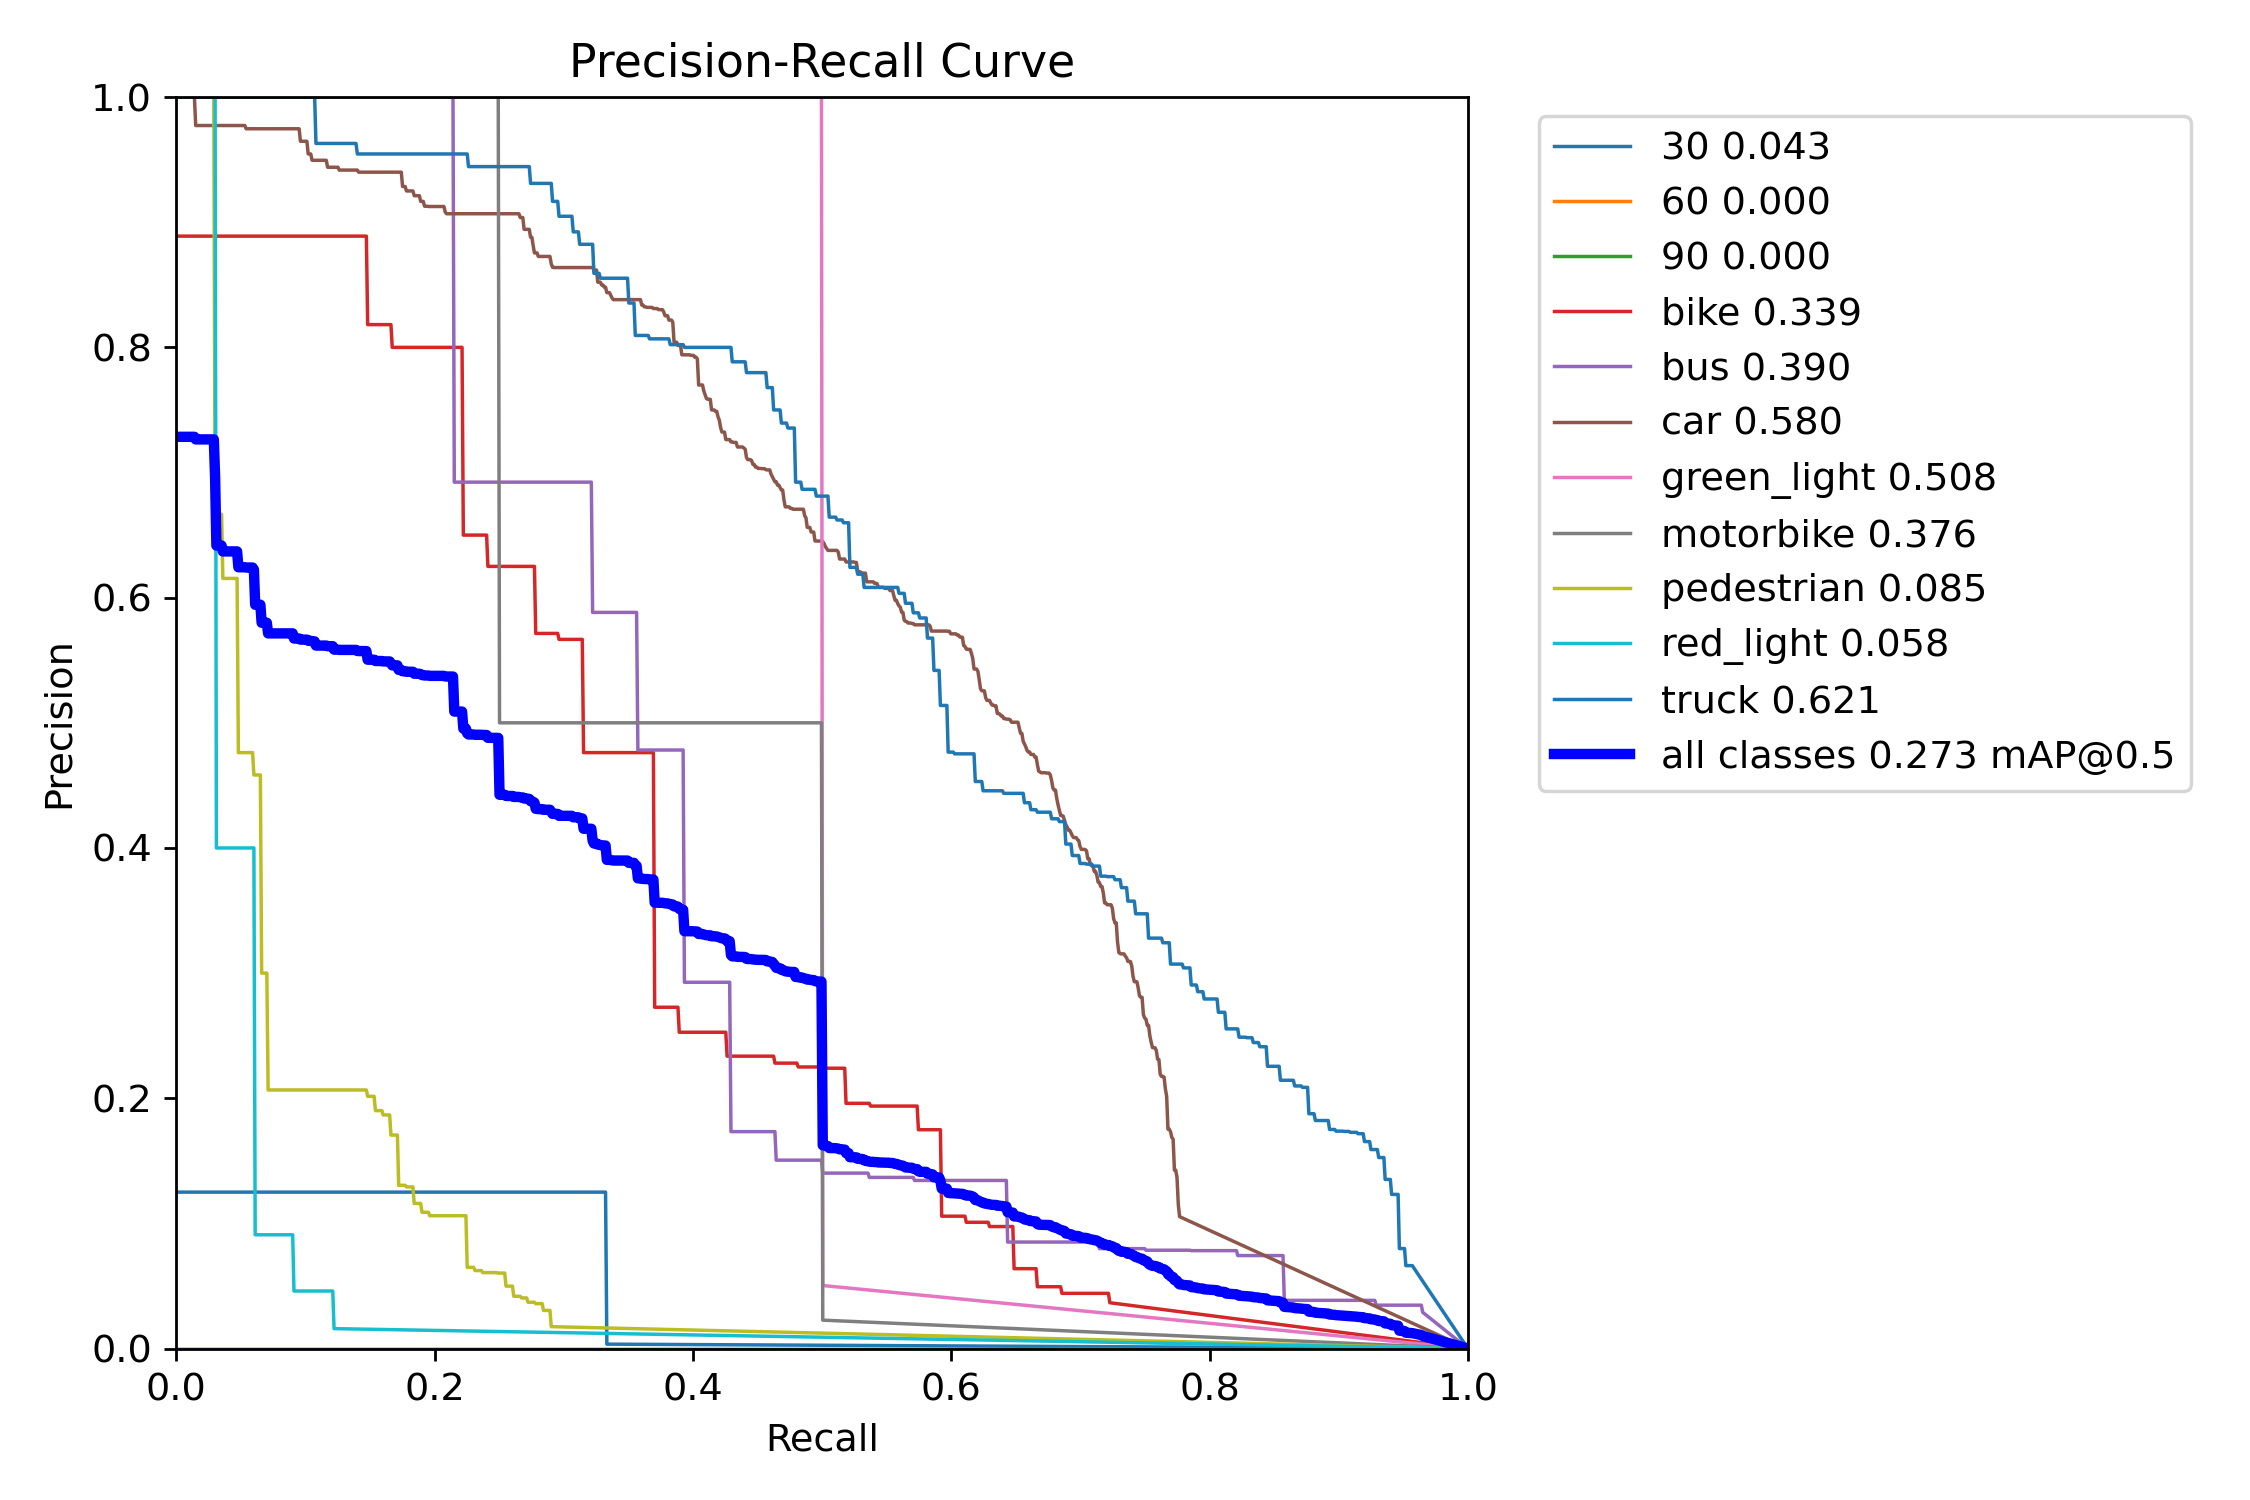

In [9]:
Image(filename=f'/content/runs/detect/train2/PR_curve.png', width=1420)

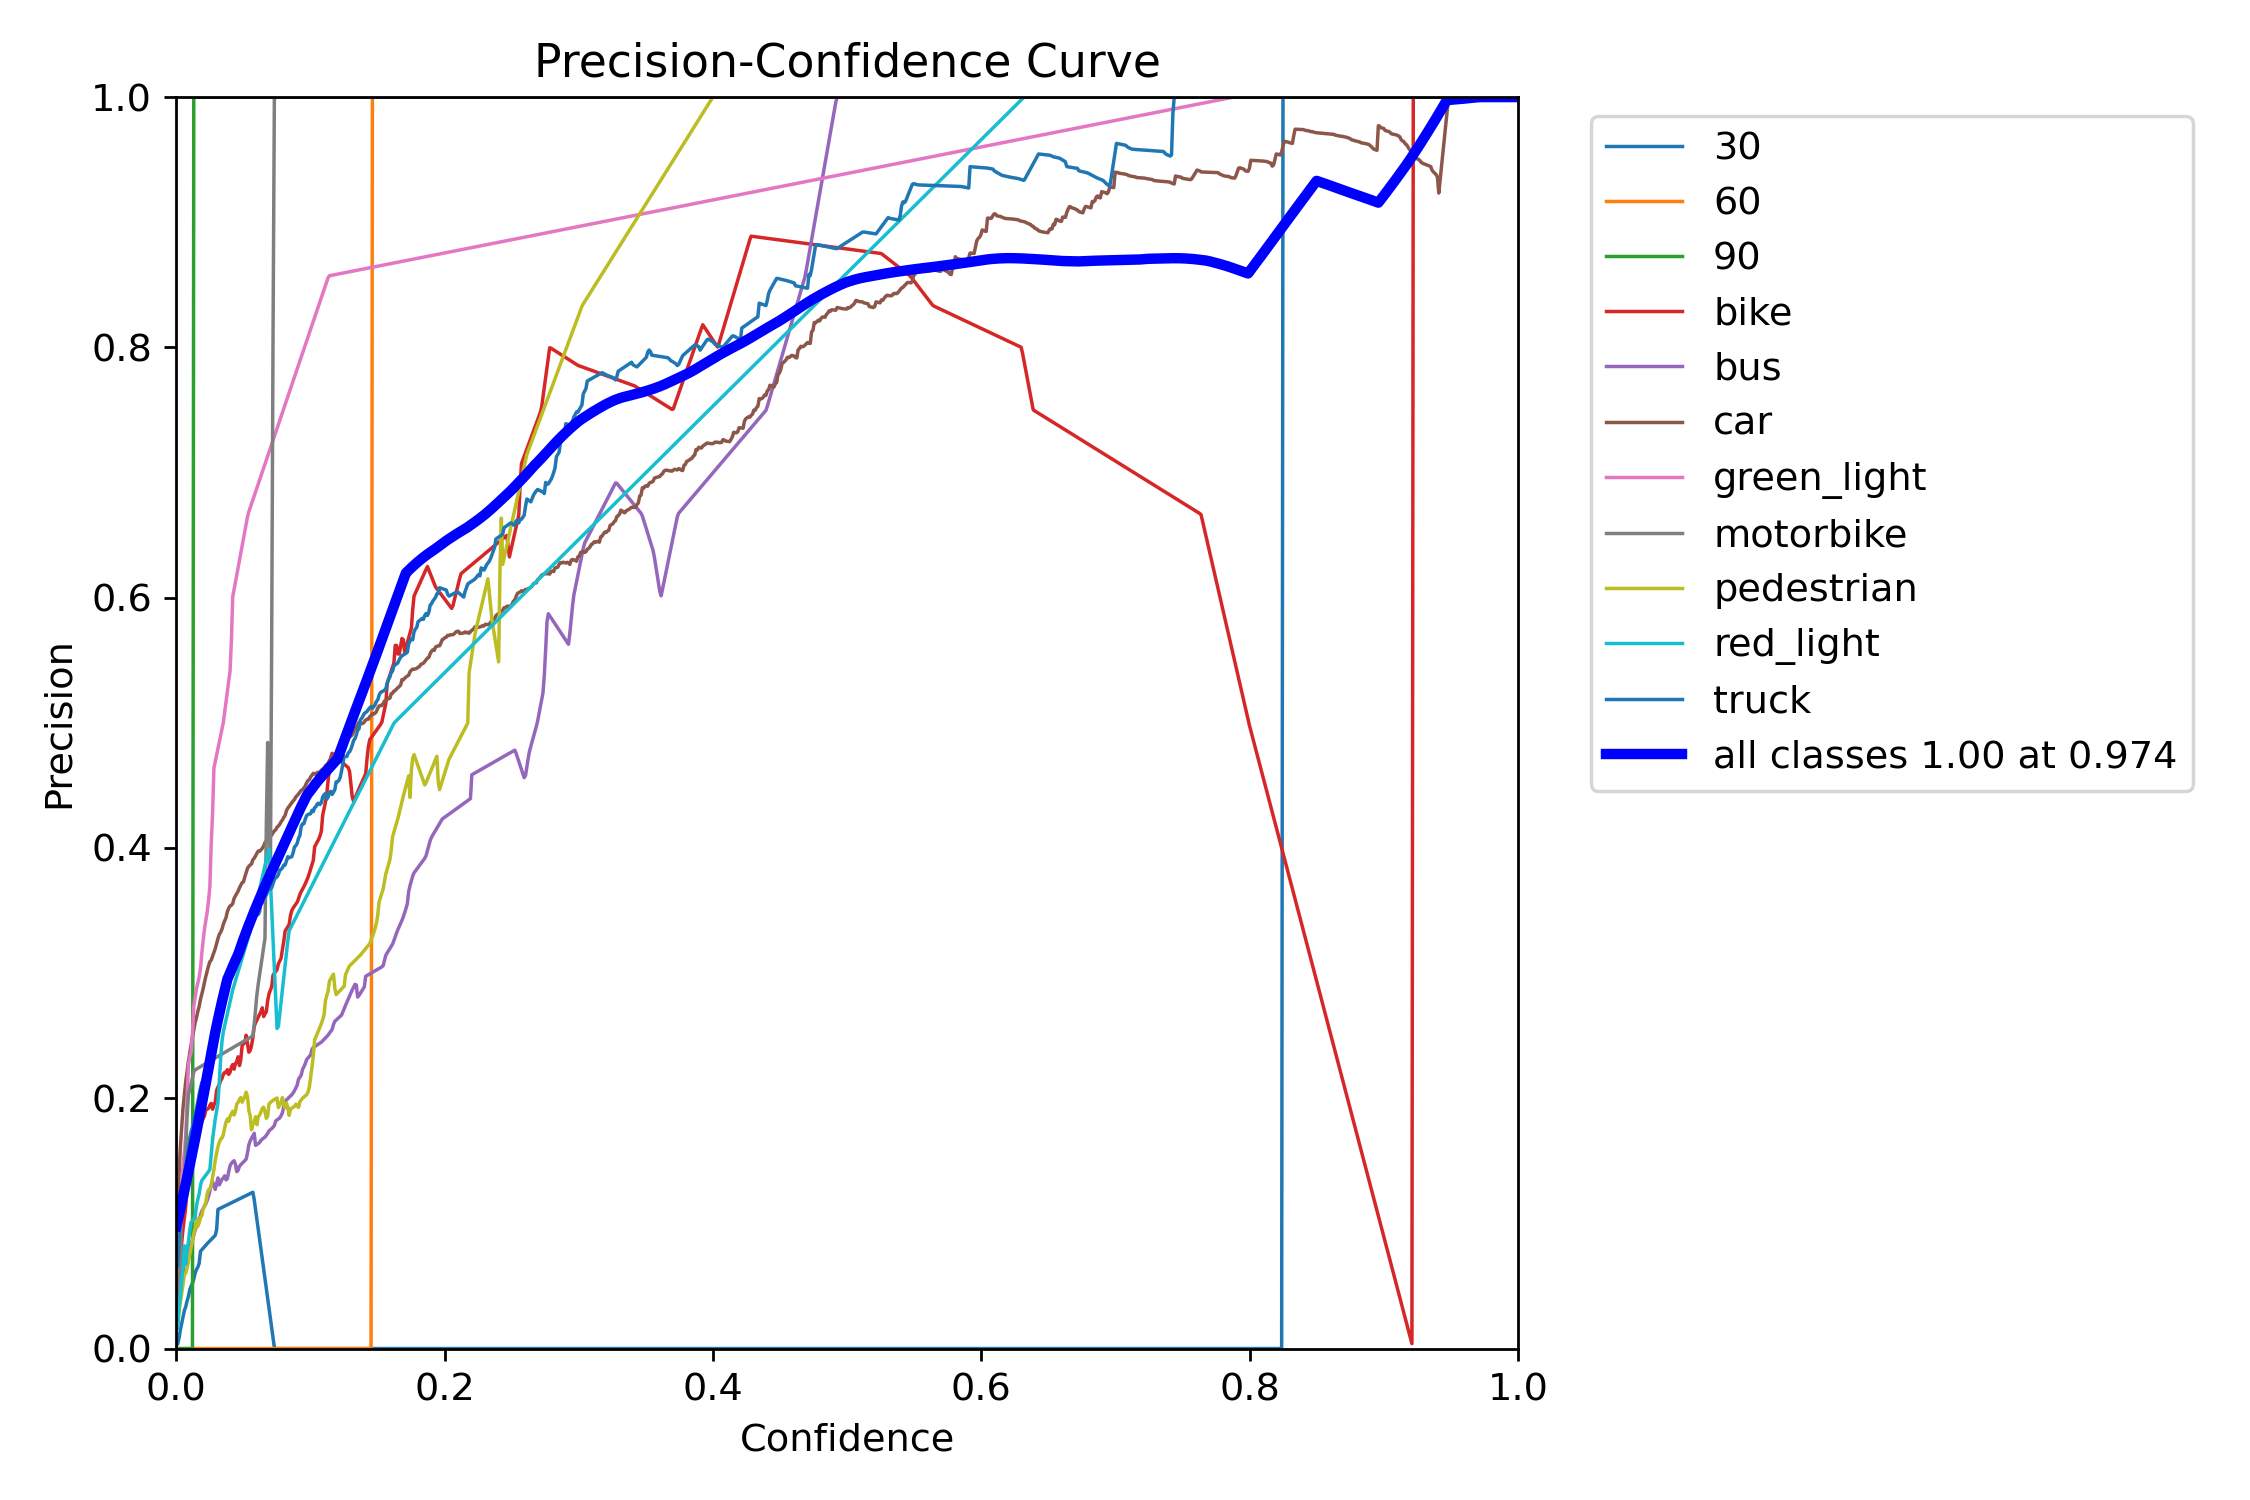

In [10]:
Image(filename=f'/content/runs/detect/train2/P_curve.png', width=1420)

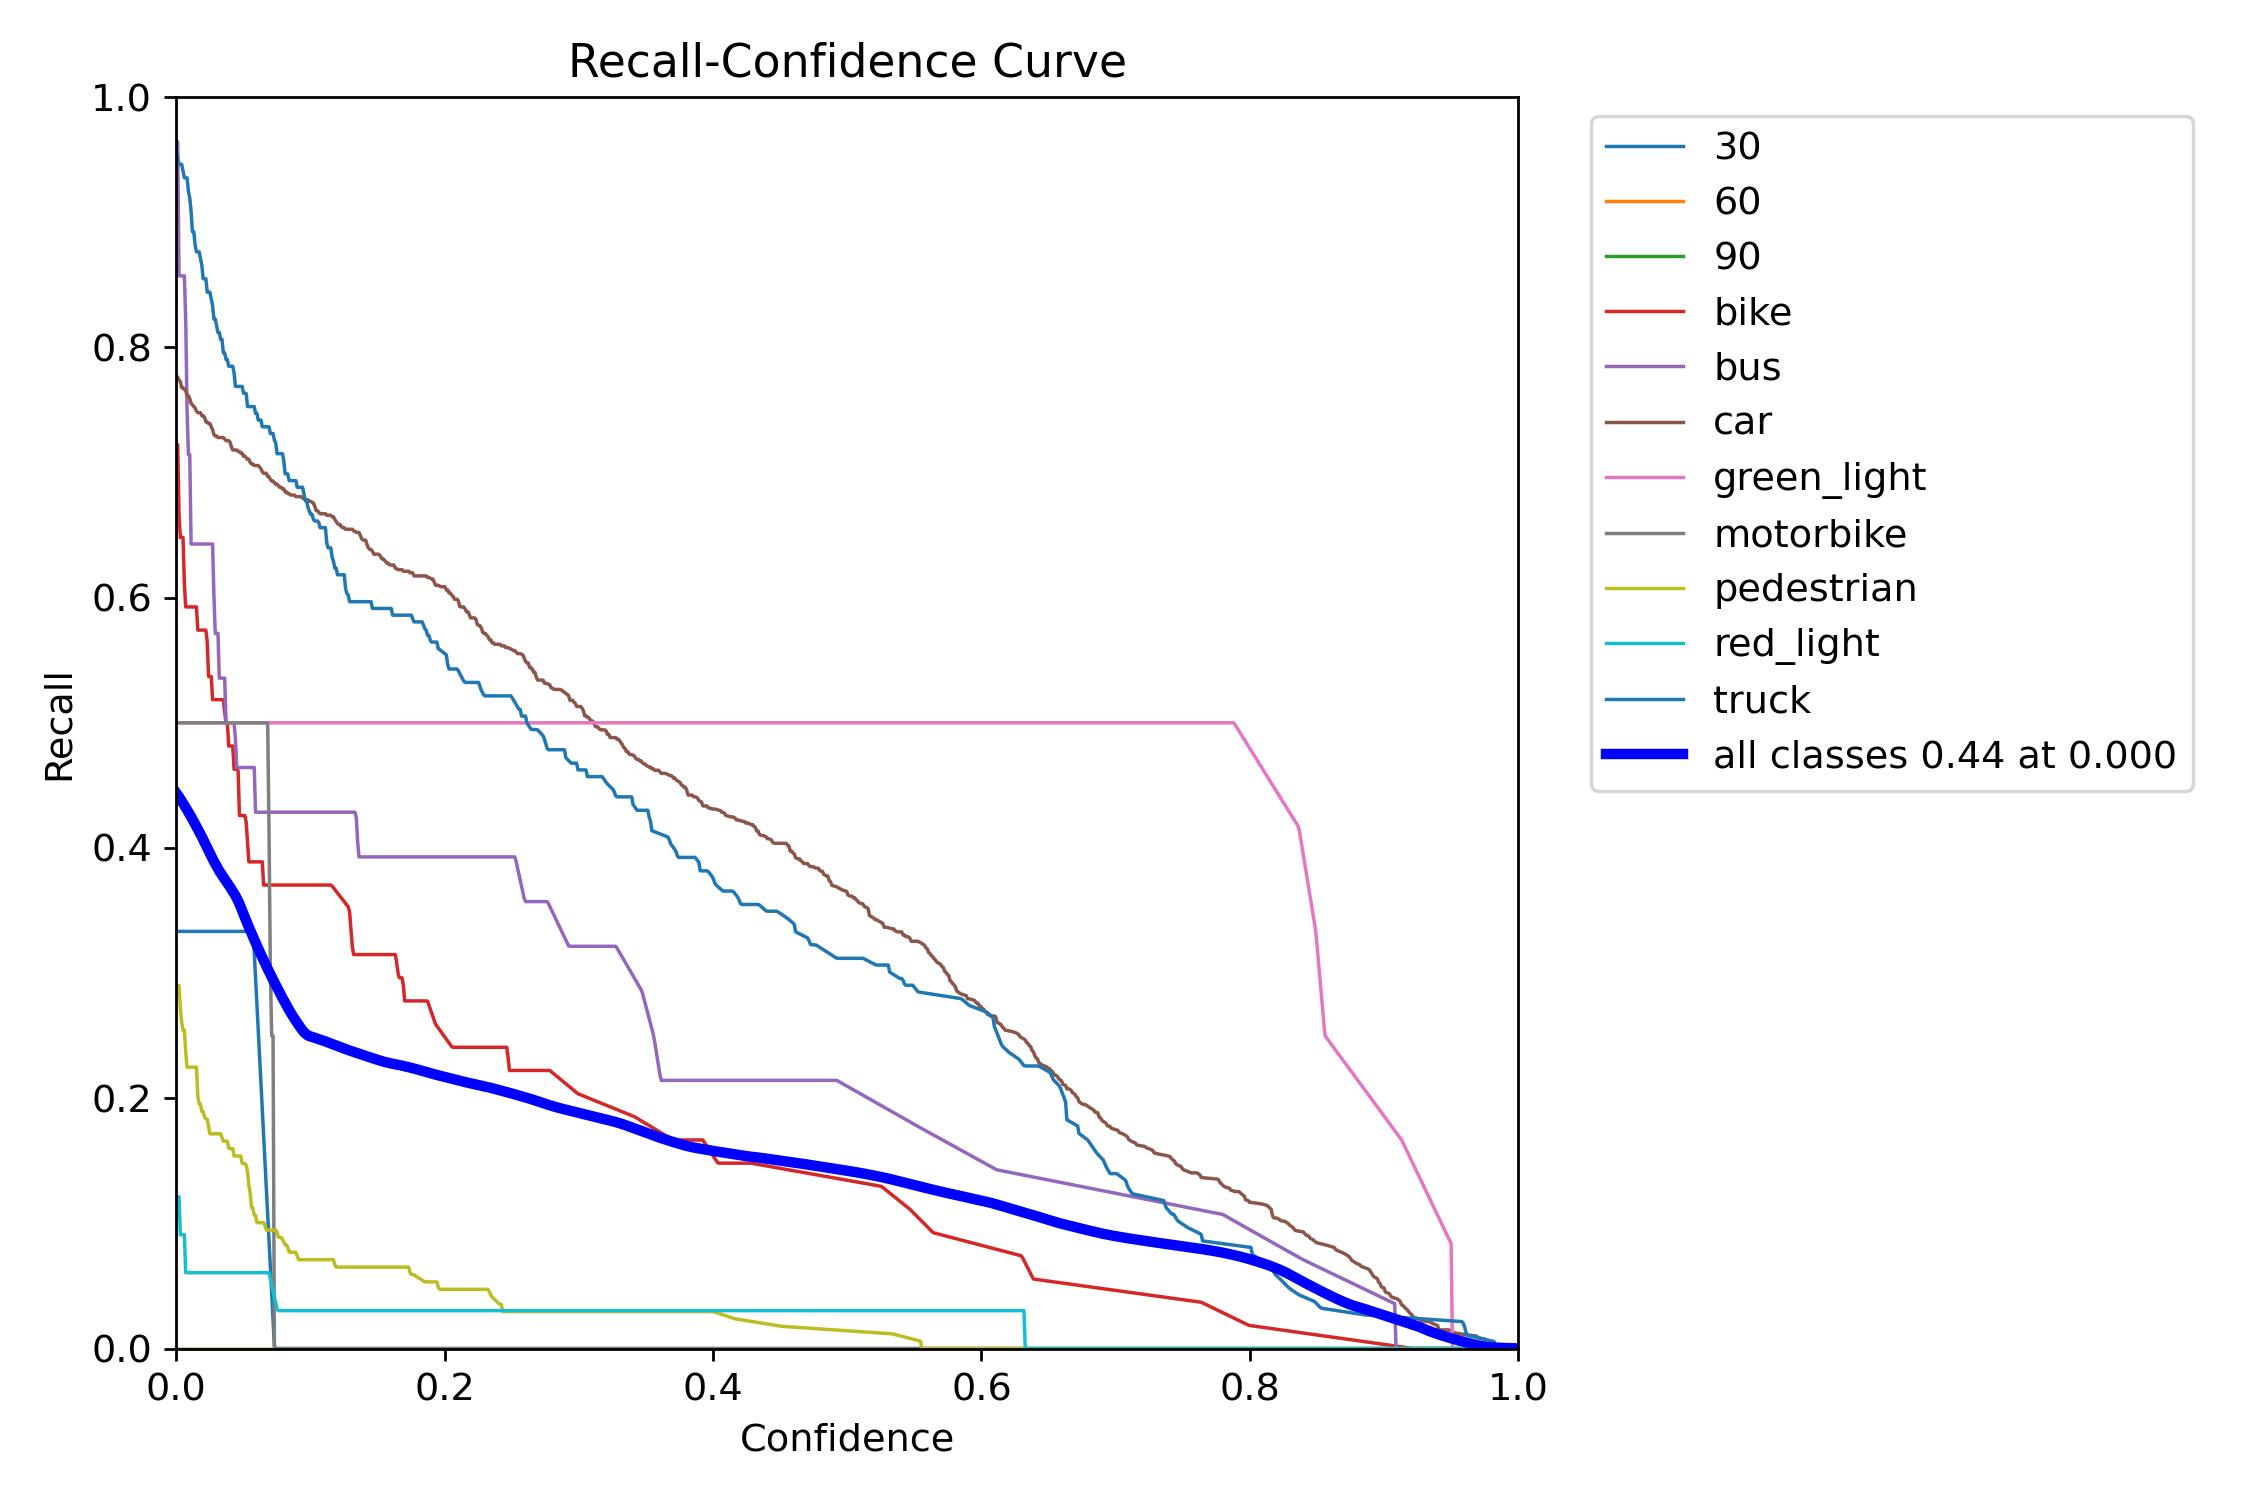

In [11]:
Image(filename=f'/content/runs/detect/train2/R_curve.png', width=1420)

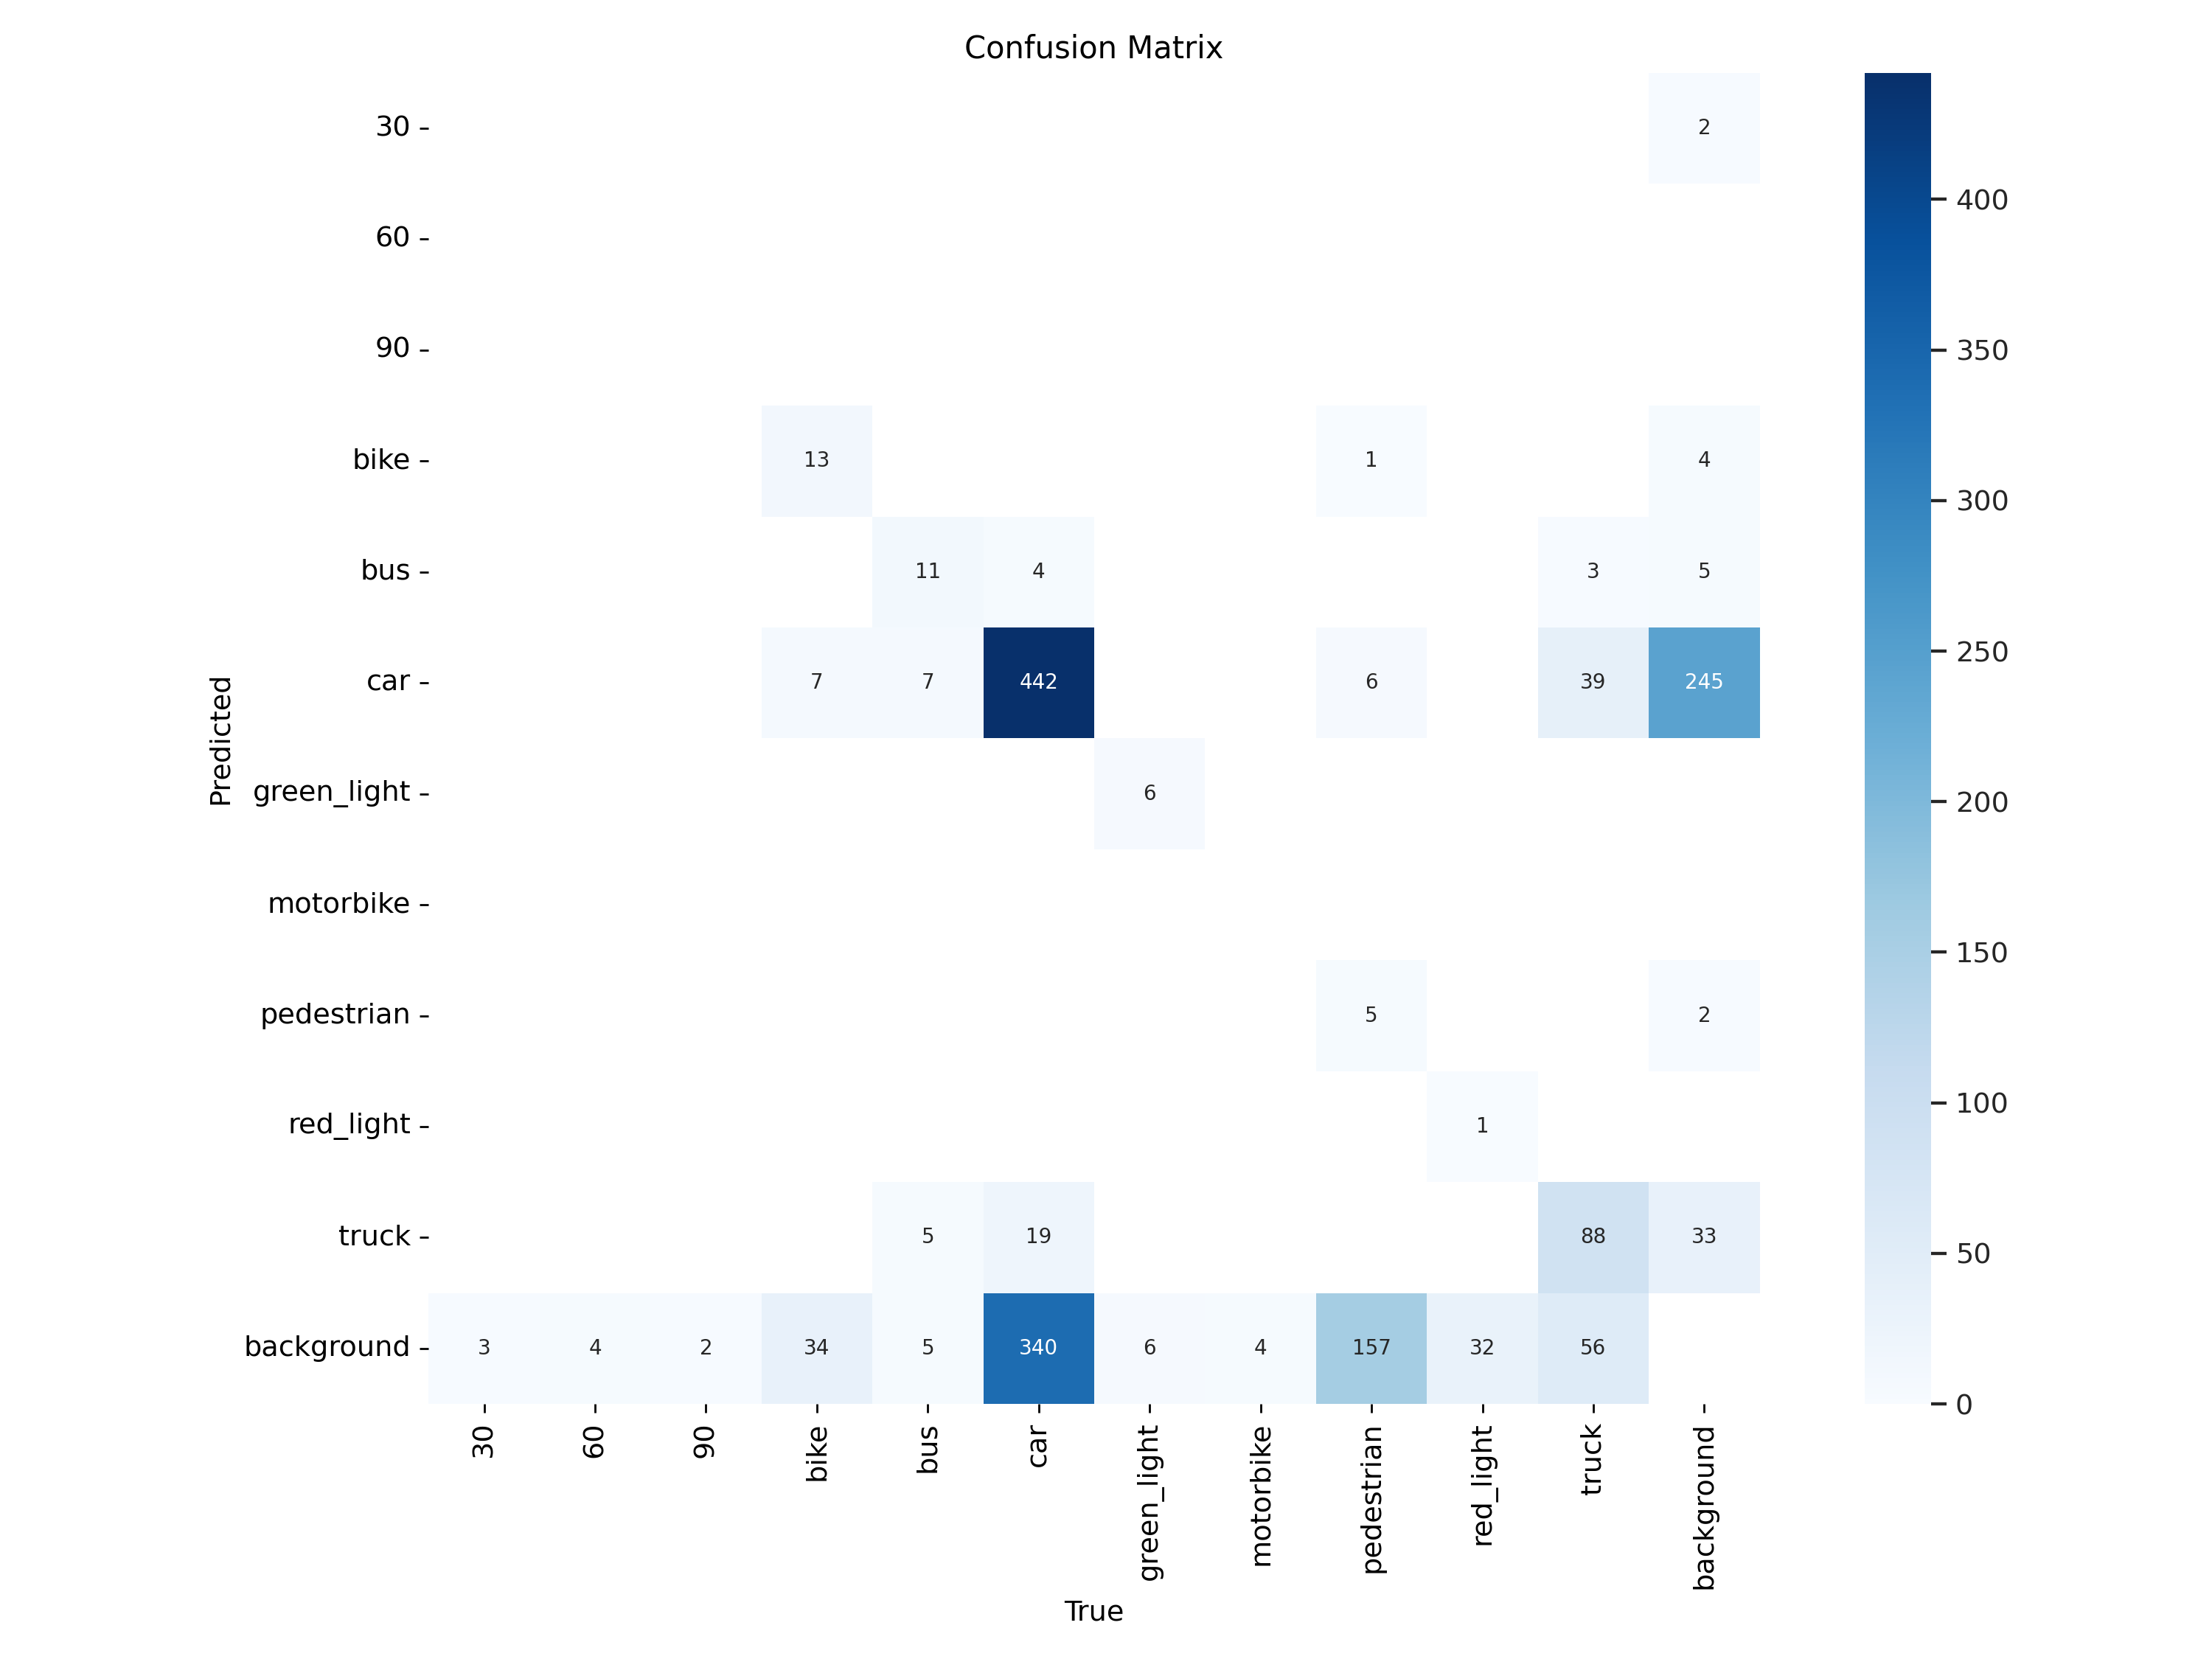

In [12]:
Image(filename=f'/content/runs/detect/train2/confusion_matrix.png', width=1420)

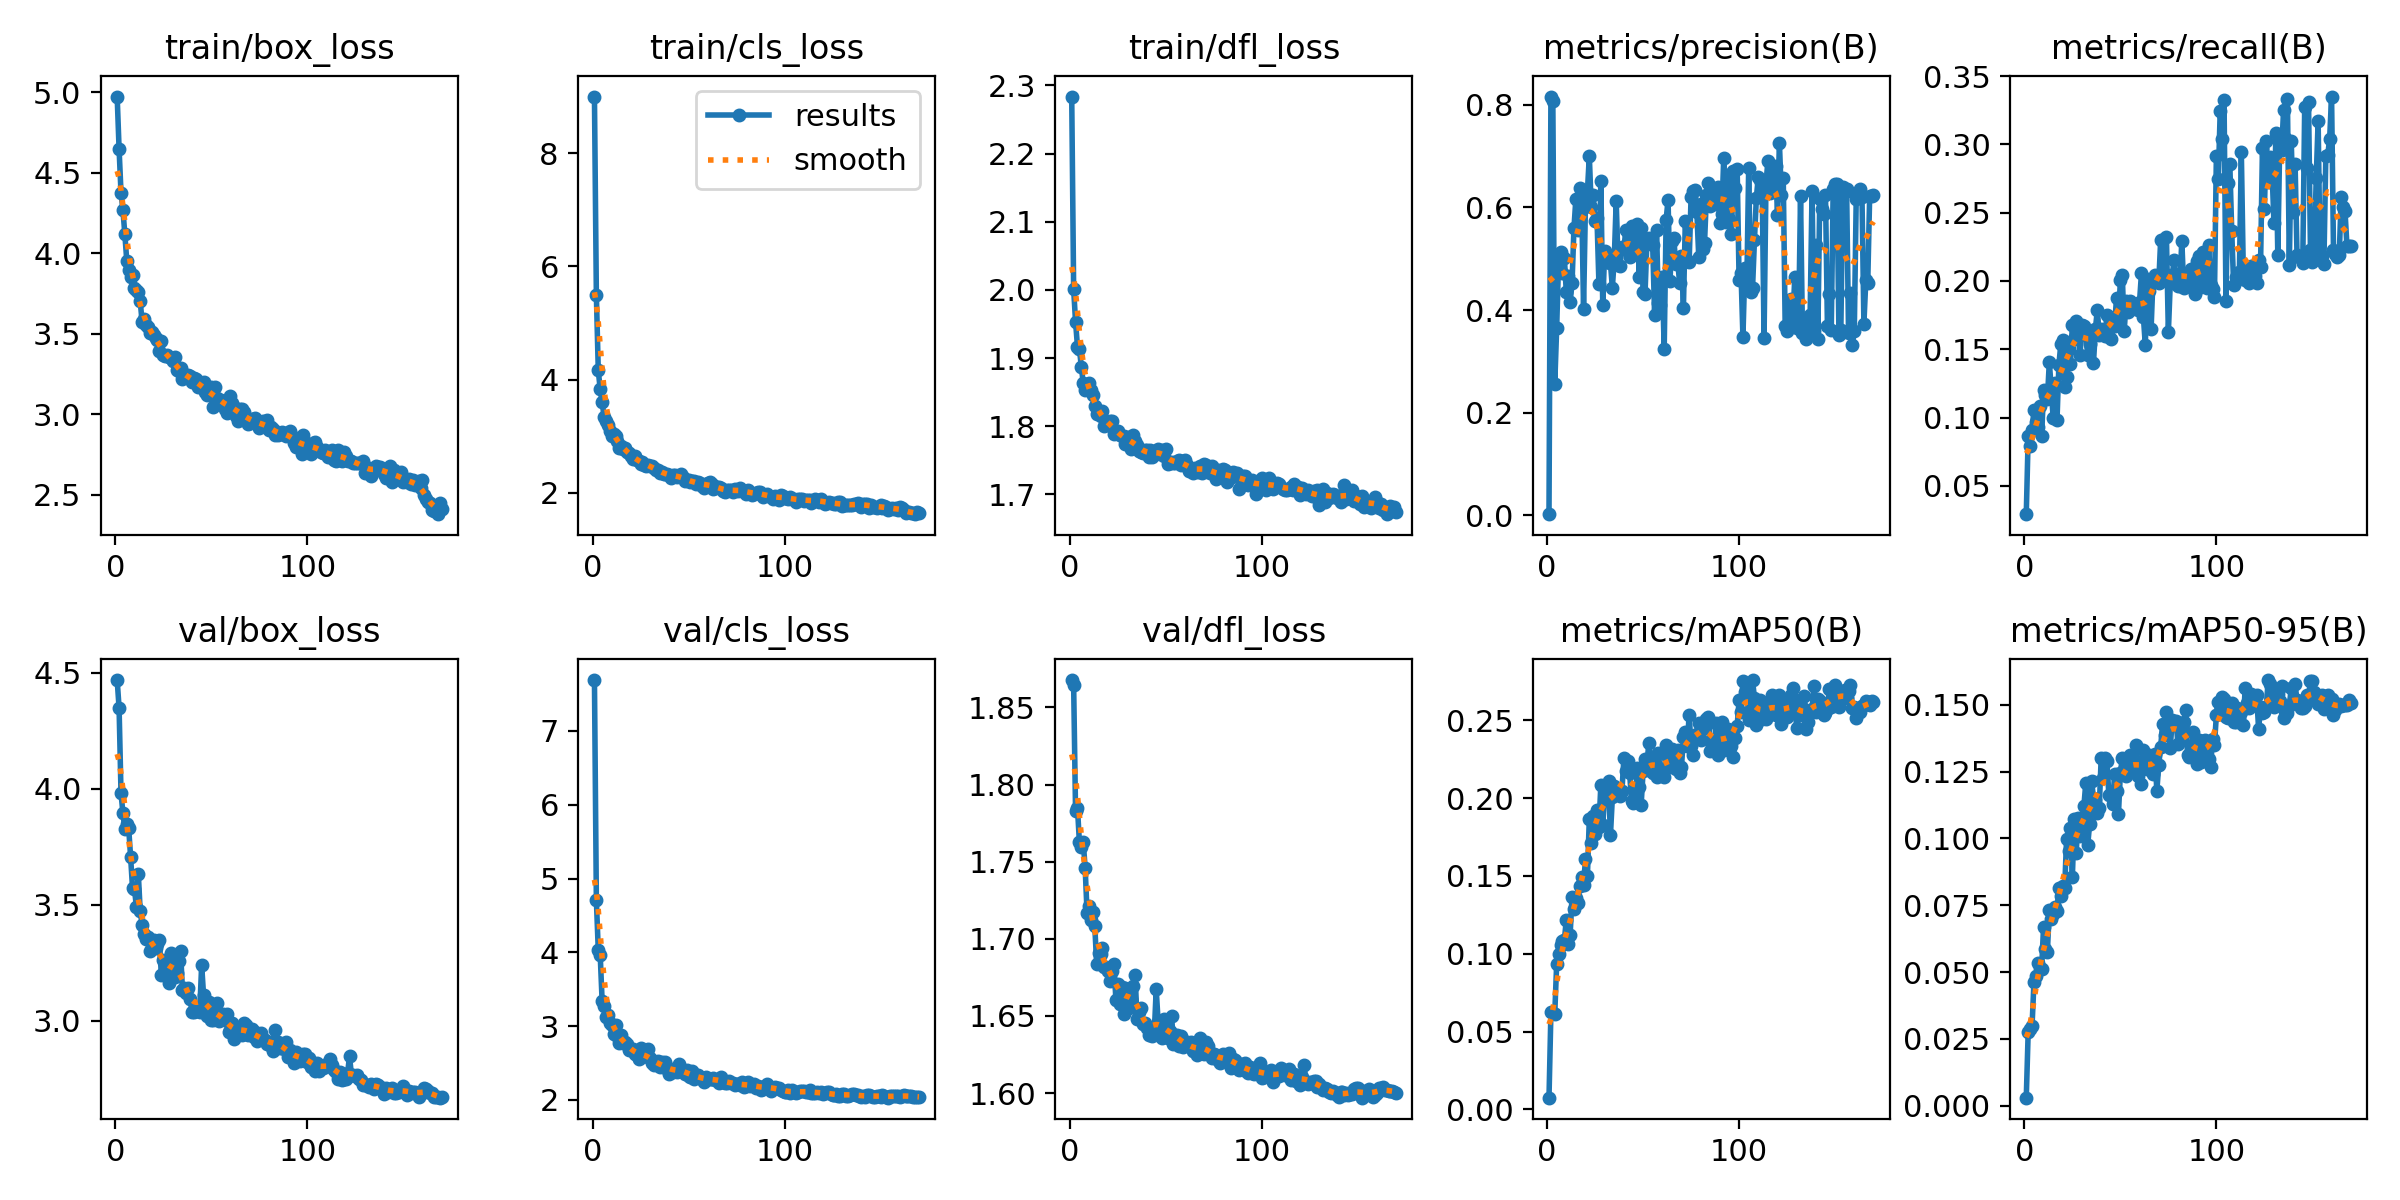

In [13]:
Image(filename=f'/content/runs/detect/train2/results.png', width=1420, height=720)

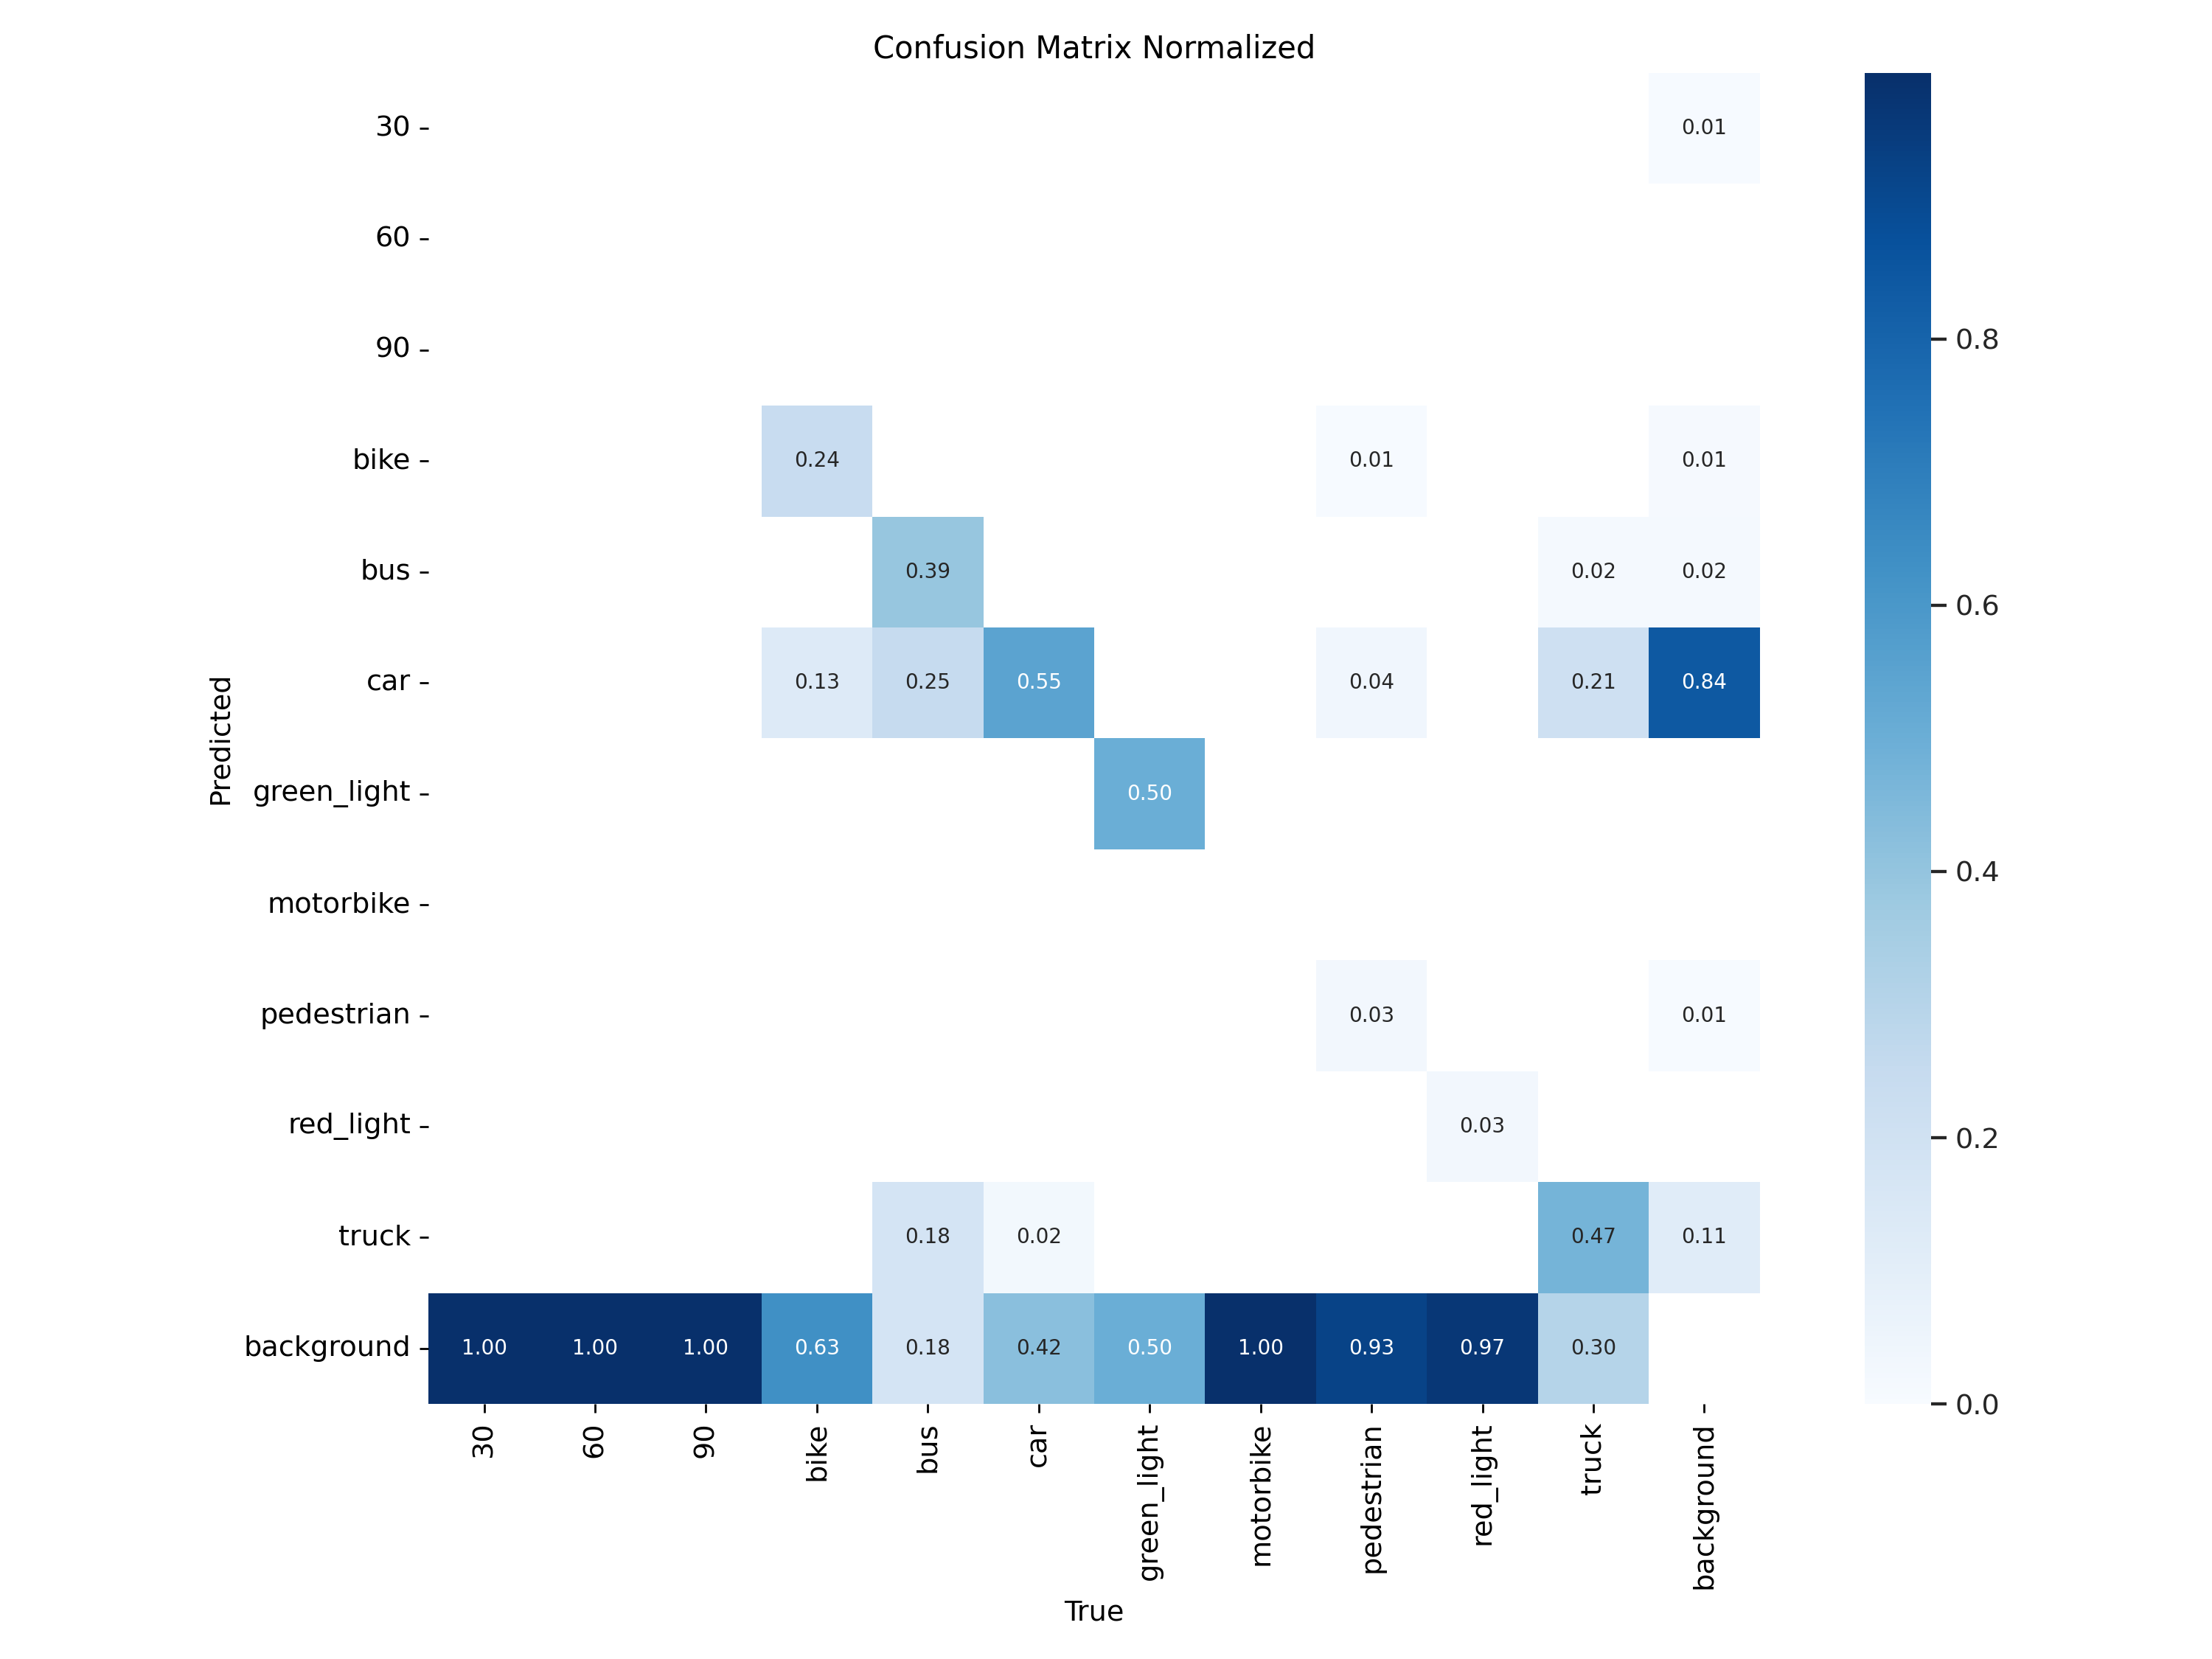

In [14]:
Image(filename=f'/content/runs/detect/train2/confusion_matrix_normalized.png', width=1420)

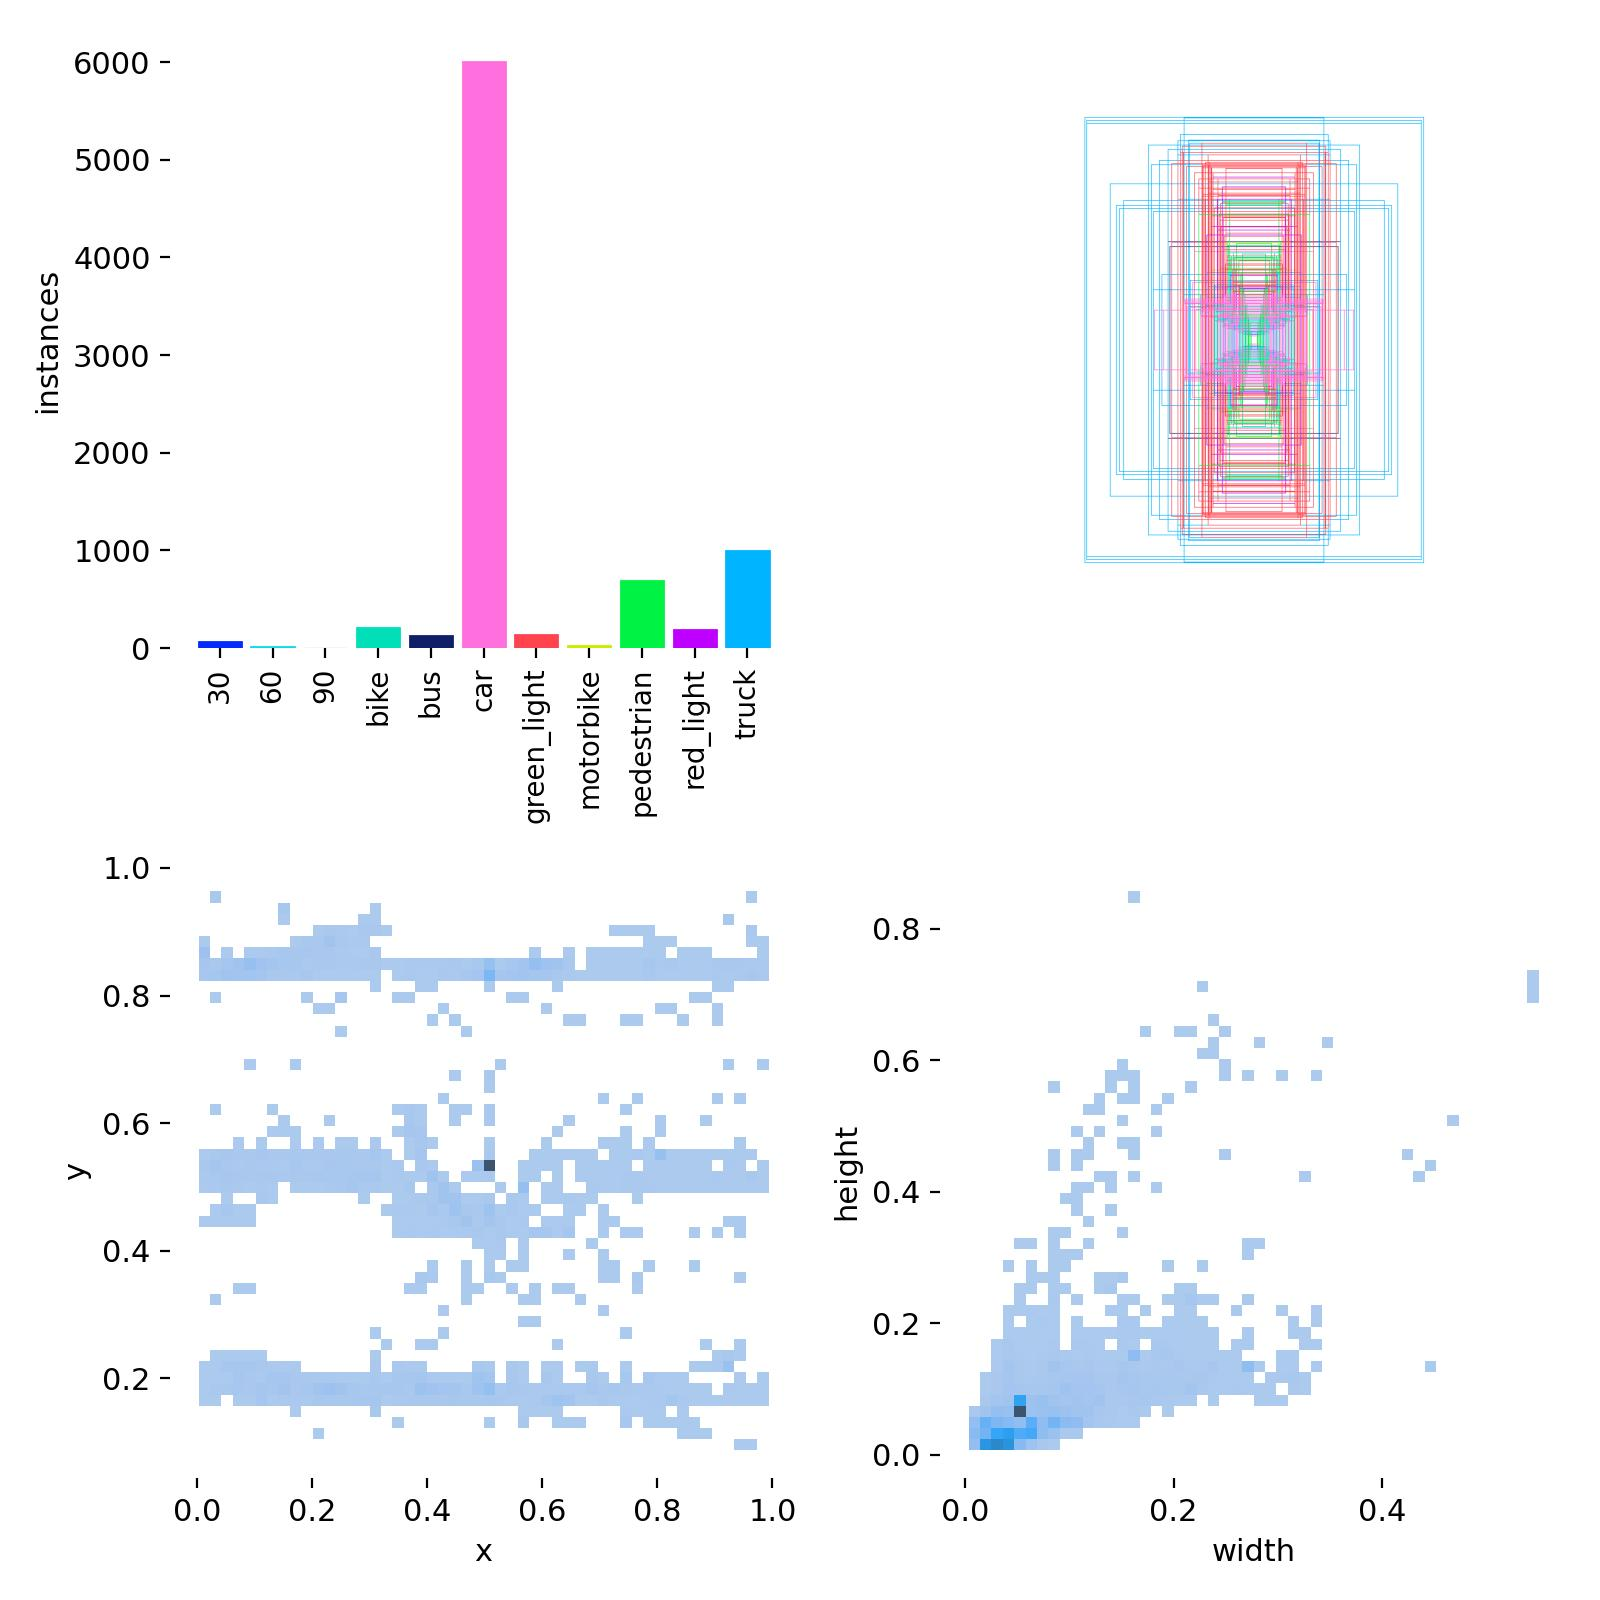

In [15]:
Image(filename=f'/content/runs/detect/train2/labels.jpg', width=1420)

In [1]:
import shutil

# Create a zip file using shutil
shutil.make_archive('/content/yolov10_run', 'zip', '/content/runs')

# Download the file
from google.colab import files
files.download("/content/yolov10_run.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>